<div align="center">
<h1> 
Analytics and Application - WS2021/22 <br>
Master of Science WI / IS <br>
Faculty of Management, Economics, and Social Sciences <br>
Department of Information Systems for Sustainable Society University of Cologne </h1>
</div>
    
<hr>

<div align="center"> 
    <b>Instructor </b> Prof. Dr. Wolfgang Ketter <br>
    <b> TA </b> Nastaran Naseri
</div>

<hr>

<div align="center">
<h3> 
Team Assignment - Team 06 <br>
Data Miners CABIB <br>
Isabel Wittmann, Bastian Schneider, Andrej Kotsovolos, Björn Reibke & Carsten Stukenborg </h3>
</div>

<hr>

<div align="center">
<h5> Dataset Chicago 2019 </h5>
</div>

<hr>
    
<div align="center">
<h2> 4. Predictive Analysis </h2>
</div>

# 4.0 Introduction
As the future demand is a key factor that will guide operational decision making of Divvy bikes,
we are interested in forecasting total system-level demand in the next hour. In order to do that, we developed prediction models using features available in and derived from the datasets.

Overview: 
- 4.1  Feature Engineering and Data Preparation 
    - 4.1.1 Feature Engineering
    - 4.1.2 Preparation for Predictive Analytics: Demand Calculation  
    
- 4.2. Introduction to Regression Algorithms
    
- 4.3 (Multi-) Linear Regression
    - 4.3.1 Define Data Sets
    - 4.3.2 Check for Linearity
    - 4.3.3 (Simple) Linear Regression
    - 4.3.4 Multi Linear Regression
    - 4.3.5 Polynomial Regression
    - 4.3.6 Regularization
    - 4.3.7 Final Linear Regression Model
    - 4.3.8 Regression Conclusion
    
- 4.4 Random Forest
    - 4.4.1 Creating a First Model and Improved Feature Engineering
    - 4.4.2 Hyperparameter Tuning
    - 4.4.3 Hyperparameter Tuning Using Grid Search
    - 4.4.4 Final Results
    
- 4.5 XGBoost
    - 4.5.1 Creating a First Model
    - 4.5.2 Tuning Hyperparameters Using GridSearch
    - 4.5.3 Final Results
    
- 4.6 Model Selection and Outlook
    

In [1]:
# Imports: 
import numpy as np
from numpy import sqrt, arange 

import pandas as pd
from pandas import read_csv

import seaborn as sns

import datetime
from datetimerange import DateTimeRange

import warnings
warnings.filterwarnings('ignore')
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

import datetime
from datetimerange import DateTimeRange

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, mean_absolute_percentage_error

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, BaggingClassifier

from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import xgboost as xgb
from xgboost import XGBRegressor

In [2]:
# Import the data
divvy_bike_set = pd.read_csv("../data/bike_weather_clean.csv", parse_dates=["start_time", "end_time", "full_hour_start", "full_hour_end"])

In [3]:
weather_set = pd.read_csv("../data/weather_clean_interpol.csv",parse_dates=["full_hour_start"])

<h2> 4.1 Feature Engineering and Data Preparation </h2>

### 4.1.1 Feature Engineering

During the feature engineering process we drew on our domain knowledge, which especially is build upon the descriptive analytics part, and several literature sources. As a final result, we consolidated the following table.

<table>
  <thead>
    <tr>
      <th style="text-align: left">Feature</th>
      <th style="text-align: left">Description</th>
      <th style="text-align: left">Correlation</th>
      <th style="text-align: left">Source/Domain knowledge</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: left">Temperature</td>
      <td style="text-align: left">Average temperature in Celsius for the corresponding time in Chicago</td>
      <td style="text-align: left">Colder temperature --> Less trips, Warmer temperatures --> More trips</td>
      <td style="text-align: left">Seasonality pattern, descriptive analytics 2.1</td>
    </tr>
    <tr>
      <td style="text-align: left">Precip</td>
      <td style="text-align: left">Indicates if it was raining or not for the corresponding time in Chicago <br> True - Rainfall during time <br> False - Otherwise</td>
      <td style="text-align: left">If it is raining, less people rent a bike</td>
      <td style="text-align: left">Precip impact, descriptive analytics 2.1.2.2</td>
    </tr>
          <tr>
      <td style="text-align: left">Season</td>
      <td style="text-align: left">Seasons of the year <br>
          1 - Spring (May to March) <br>
          2 - Summer (June to August)<br>
          3 - Autumn (September to November)<br>
          4 - Winter (December to February) </td>
      <td style="text-align: left">Summer season has a higher demand than the winter season</td>
      <td style="text-align: left">Seasonality pattern, descriptive analytics 2.1</td>
    </tr>
          <tr>
      <td style="text-align: left">Month</td>
      <td style="text-align: left">Month of corresponding time</td>
      <td style="text-align: left">Certain months have higher demands than others (e.g. comparing August and February)</td>
      <td style="text-align: left">Impact of different months, descriptive analytics 2.1.2.1 </td>
    </tr>
          <tr>
      <td style="text-align: left">IsWeekday</td>
      <td style="text-align: left">Indicates if the corresponding time is on a weekday or not <br> True - Time is on weekday <br> False - Otherwise</td>
      <td style="text-align: left">Usually demand is higher on weekdays (people getting to work etc.)</td>
      <td style="text-align: left">Weekday/Weekend impact, descriptive analytics 2.1.2.2</td>
    </tr>
          <tr>
      <td style="text-align: left">Weekday</td>
      <td style="text-align: left">Indicates which weekday is given for the corresponding time <br> 1 - Monday <br> 2 - Tuesday <br> 3 - Wednesday <br> 4 - Thursday <br> 5 - Friday <br> 6 - Saturday <br> 7 - Sunday</td>
      <td style="text-align: left">The demand can vary from weekday to weekday</td>
      <td style="text-align: left">Weekday/Weekend impact, descriptive analytics 2.1.2.3</td>
    </tr>
          <tr>
      <td style="text-align: left">Hour</td>
      <td style="text-align: left">The hour of the corresponding time</td>
      <td style="text-align: left">The demand varies during the whole day, e.g.during the night the demand is way lower than during the midday</td>
      <td style="text-align: left">Hour impact, descriptive analytics 2.1.2.4 & 2.1.2.5</td>
    </tr>
                <tr>
      <td style="text-align: left">isDay</td>
      <td style="text-align: left">Indicates if the corresponding time is during the day or not <br> True - From 6 am to 8 pm <br> False - Otherwise</td>
      <td style="text-align: left">We decided the period from 6 am - 8 pm to be day due to the people’s activity and time of sunrise and sunset. During the day the demand of bikes is higher than during the night</td>
      <td style="text-align: left">Hour impact, descriptive analytics 2.1.2.4 & 2.1.2.5</td>
    </tr>
                <tr>
      <td style="text-align: left">IsEveningRushHour</td>
      <td style="text-align: left">Indicates if the corresponding time is during the evening rush hour <br> True - From 4 pm to 6 pm <br> False - Otherwise</td>
      <td style="text-align: left">During the evening rush hour the demand is very often at its peak, so more bikes are needed. </td>
      <td style="text-align: left">Literature: "Excess demand prediction for bike sharing systems" (Liu, 2021), "Analysis and Prediction of Bike Sharing Traffic Flow" (Hamad, 2020), "Predicting Bike Usage for New York City’s Bike Sharing System" (Singhvi, 2015) + evening rush hour impact, descriptive analytics 2.1.2.5</td>
    </tr>
                <tr>
      <td style="text-align: left">IsMorningRushHour</td>
      <td style="text-align: left">Indicates if the corresponding time is during the morning rush hour <br> True - From 7 am to 8 am <br> False - Otherwise</td>
      <td style="text-align: left">During the morning rush hour the demand is very often at its second highest peak.</td>
      <td style="text-align: left">Literature: "Excess demand prediction for bike sharing systems" (Liu, 2021), "Analysis and Prediction of Bike Sharing
Traffic Flow" (Hamad, 2020), "Predicting Bike Usage for New York City’s Bike Sharing System" (Singhvi, 2015) + morning rush hour impact, descriptive analytics 2.1.2.5 </td>
    </tr>
  </tbody>
</table>

In addition to the features above we also found two other features inside the literature.

The first one is the "isHoliday" feature (Xiao Yan, “Predicting Hourly Demand in Station-free Bike-sharing Systems with Video-level Data”) which indicates if the corresponding time is on a holiday or not. However, in the paper this feature was relatively unimportant and did not play a huge role. So we did not include it.

The next would be the average number of bikes attempted to be rented but there was no availability for them (Xin Liu, “Excess demand prediction for bike sharing systems”). But as we have seen in the chapter 2.3.5 about descriptive analytics there are only a few points in time where there was more demand than supply on a station. So again, we did not include this feature.

Features that we did not include as they do not correlate to the demand (from our perspective) are the start/end station id/name, bike_id, user_type, quarter (as it is represented in the seasons), full hour start and the duration.

In the following code rows, we now calculate these features and add them to our data set.

In [5]:
# Drop all irrelevant columns, precip and max temp are dropped because we need to merge the set again in order to calculate the demand
bike_predictive = divvy_bike_set.drop(columns=["start_station_id", "end_station_id", "start_station_name", "end_station_name", "bike_id", "user_type", "interpol", "Quarter", "full_hour_start", "max_temp", "precip"])

In [6]:
bike_predictive.head(5)

,start_time,end_time,duration_time,duration_sec,duration_min,duration_hour,weekday_start,full_hour_end,hour
0,2019-01-01 00:04:37,2019-01-01 00:11:07,0 days 00:06:30,390.0,6.500000,0.108333,True,2019-01-01 00:00:00,0
1,2019-01-01 00:08:13,2019-01-01 00:15:34,0 days 00:07:21,441.0,7.350000,0.122500,True,2019-01-01 00:00:00,0
2,2019-01-01 00:13:23,2019-01-01 00:27:12,0 days 00:13:49,829.0,13.816667,0.230278,True,2019-01-01 00:00:00,0
3,2019-01-01 00:13:45,2019-01-01 00:43:28,0 days 00:29:43,1783.0,29.716667,0.495278,True,2019-01-01 01:00:00,0
4,2019-01-01 00:14:52,2019-01-01 00:20:56,0 days 00:06:04,364.0,6.066667,0.101111,True,2019-01-01 00:00:00,0


In [7]:
# Calculate a new column for the month of the bike rental entry
bike_predictive['month'] = pd.DatetimeIndex(bike_predictive['start_time']).month

In [8]:
# Add new feature: Calculate a new column for the season of the bike rental entry

# First create a list of season conditions
season_conditions = [
    ((bike_predictive["month"] == 3) | (bike_predictive["month"] == 4) | (bike_predictive["month"] == 5)),
    ((bike_predictive["month"] == 6) | (bike_predictive["month"] == 7) | (bike_predictive["month"] == 8)),
    ((bike_predictive["month"] == 9) | (bike_predictive["month"] == 10) | (bike_predictive["month"] == 11)),
    ((bike_predictive["month"] == 12) | (bike_predictive["month"] == 1) | (bike_predictive["month"] == 2))]

# Create a list of value to assign if the conditions are true
season_value = [1,2,3,4]

# Create a new column and use np.select to assign values to it using our lists as arguments
bike_predictive["season"] = np.select(season_conditions, season_value)

In [9]:
# Rename column to match feature engineering
bike_predictive = bike_predictive.rename(columns={"weekday_start":"isWeekday"})
# NEW 
bike_predictive['isWeekday'] = bike_predictive['isWeekday'].astype(int)

In [10]:
# Add new column for the full hour of the bike rental (not rounded)
bike_predictive["full_hour"] = pd.DatetimeIndex(bike_predictive['start_time']).hour

In [11]:
# Add new feature: Categorize if the rental is in the night or day 
bike_predictive["isDay"] = np.where(((bike_predictive["full_hour"] >= 6) & (bike_predictive["full_hour"] <= 20)), 1, 0)

In [12]:
# Add new feature: Categorize if the rental is in morning rush hour
bike_predictive["isMorningRushHour"] = np.where(((bike_predictive["full_hour"] >= 7) & (bike_predictive["full_hour"] <= 8)), 1, 0)

In [13]:
# Add new feature: Categorize if the rental is in the evening rush hour 
bike_predictive["isEveningRushHour"] = np.where(((bike_predictive["full_hour"] >= 16) & (bike_predictive["full_hour"] <= 18)), 1, 0)

In [14]:
# Introduce new column with all hours rounded to the previous full hour in order to
# to be able to caculate the weekday and demnad later on
bike_predictive["full_hour_start"] = bike_predictive["start_time"].dt.floor('H')

In [15]:
bike_predictive.head(5)

,start_time,end_time,duration_time,duration_sec,duration_min,duration_hour,isWeekday,full_hour_end,hour,month,season,full_hour,isDay,isMorningRushHour,isEveningRushHour,full_hour_start
0,2019-01-01 00:04:37,2019-01-01 00:11:07,0 days 00:06:30,390.0,6.500000,0.108333,1,2019-01-01 00:00:00,0,1,4,0,0,0,0,2019-01-01
1,2019-01-01 00:08:13,2019-01-01 00:15:34,0 days 00:07:21,441.0,7.350000,0.122500,1,2019-01-01 00:00:00,0,1,4,0,0,0,0,2019-01-01
2,2019-01-01 00:13:23,2019-01-01 00:27:12,0 days 00:13:49,829.0,13.816667,0.230278,1,2019-01-01 00:00:00,0,1,4,0,0,0,0,2019-01-01
3,2019-01-01 00:13:45,2019-01-01 00:43:28,0 days 00:29:43,1783.0,29.716667,0.495278,1,2019-01-01 01:00:00,0,1,4,0,0,0,0,2019-01-01
4,2019-01-01 00:14:52,2019-01-01 00:20:56,0 days 00:06:04,364.0,6.066667,0.101111,1,2019-01-01 00:00:00,0,1,4,0,0,0,0,2019-01-01


<h3> 4.1.2 Preparation for Predictive Analytics: Demand Calculation </h3>

In order to predict the total system-level demand in the next hour, we need to use the hourly demand as target variable. We defined the hourly demand as total number of rentals in one hour. This is calculated in the next passage by grouping by the full hour of the starting time of a rental and then counting the occurences.

In [16]:
# Group by the full hour to only have entries for a specific date and hour
bike_predictive_grouped = bike_predictive.groupby(pd.DatetimeIndex(bike_predictive['full_hour_start'])).mean()

In [17]:
# Calculate the demand (numbers of rental on one hour) by using the size function
demand = bike_predictive.groupby("full_hour_start").size().reset_index(name='demand')

In [18]:
# Add it as column to the dataframe
bike_predictive_grouped["demand"] = demand["demand"].values
bike_predictive_grouped.head(5)

,duration_sec,duration_min,duration_hour,isWeekday,hour,month,season,full_hour,isDay,isMorningRushHour,isEveningRushHour,demand
full_hour_start,,,,,,,,,,,,
2019-01-01 00:00:00,735.560976,12.259350,0.204322,1.0,0.439024,1.0,4.0,0.0,0.0,0.0,0.0,41
2019-01-01 01:00:00,798.104167,13.301736,0.221696,1.0,1.500000,1.0,4.0,1.0,0.0,0.0,0.0,48
2019-01-01 02:00:00,745.083333,12.418056,0.206968,1.0,2.527778,1.0,4.0,2.0,0.0,0.0,0.0,36
2019-01-01 03:00:00,847.941176,14.132353,0.235539,1.0,3.411765,1.0,4.0,3.0,0.0,0.0,0.0,17
2019-01-01 04:00:00,386.222222,6.437037,0.107284,1.0,4.222222,1.0,4.0,4.0,0.0,0.0,0.0,9


In [19]:
len(bike_predictive_grouped)
# 365 * 24 = 8760
# 8760 - 8738 = 22 missing values where probaly there was no demand at all

8738

In [20]:
# Merge the grouped demand data with the weather data
# (We merged again based on corrupted precip data (not 0 or 1) after merging 
#on the rounded hours (from the data cleaning part) )
bike_predictive_grouped_weather = pd.merge(bike_predictive_grouped, weather_set, on='full_hour_start')

In [21]:
bike_predictive_grouped_weather.head(5)

,full_hour_start,duration_sec,duration_min,duration_hour,isWeekday,hour_x,month,season,full_hour,isDay,isMorningRushHour,isEveningRushHour,demand,max_temp,precip,hour_y,interpol,Quarter
0,2019-01-01 00:00:00,735.560976,12.259350,0.204322,1.0,0.439024,1.0,4.0,0.0,0.0,0.0,0.0,41,1.10,1.0,0,False,1
1,2019-01-01 01:00:00,798.104167,13.301736,0.221696,1.0,1.500000,1.0,4.0,1.0,0.0,0.0,0.0,48,1.10,0.0,1,False,1
2,2019-01-01 02:00:00,745.083333,12.418056,0.206968,1.0,2.527778,1.0,4.0,2.0,0.0,0.0,0.0,36,1.10,0.0,2,False,1
3,2019-01-01 03:00:00,847.941176,14.132353,0.235539,1.0,3.411765,1.0,4.0,3.0,0.0,0.0,0.0,17,0.55,0.0,3,True,1
4,2019-01-01 04:00:00,386.222222,6.437037,0.107284,1.0,4.222222,1.0,4.0,4.0,0.0,0.0,0.0,9,0.00,0.0,4,False,1


In [22]:
# Add new feature after final set: Calculate a new column for the actual weekday --> In oberen Teil
bike_predictive_grouped_weather["weekday"] = pd.DatetimeIndex(bike_predictive_grouped_weather['full_hour_start']).weekday

In [23]:
# Drop unrelevant columns
bike_predictive_final = bike_predictive_grouped_weather.drop(columns=["hour_x", "hour_y", "interpol", "Quarter","duration_sec","duration_min","duration_hour","full_hour_start"])

#### Feature and Target Variable Correlation

Correlation refers to how close two variables are to having a linear relationship with each other. Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

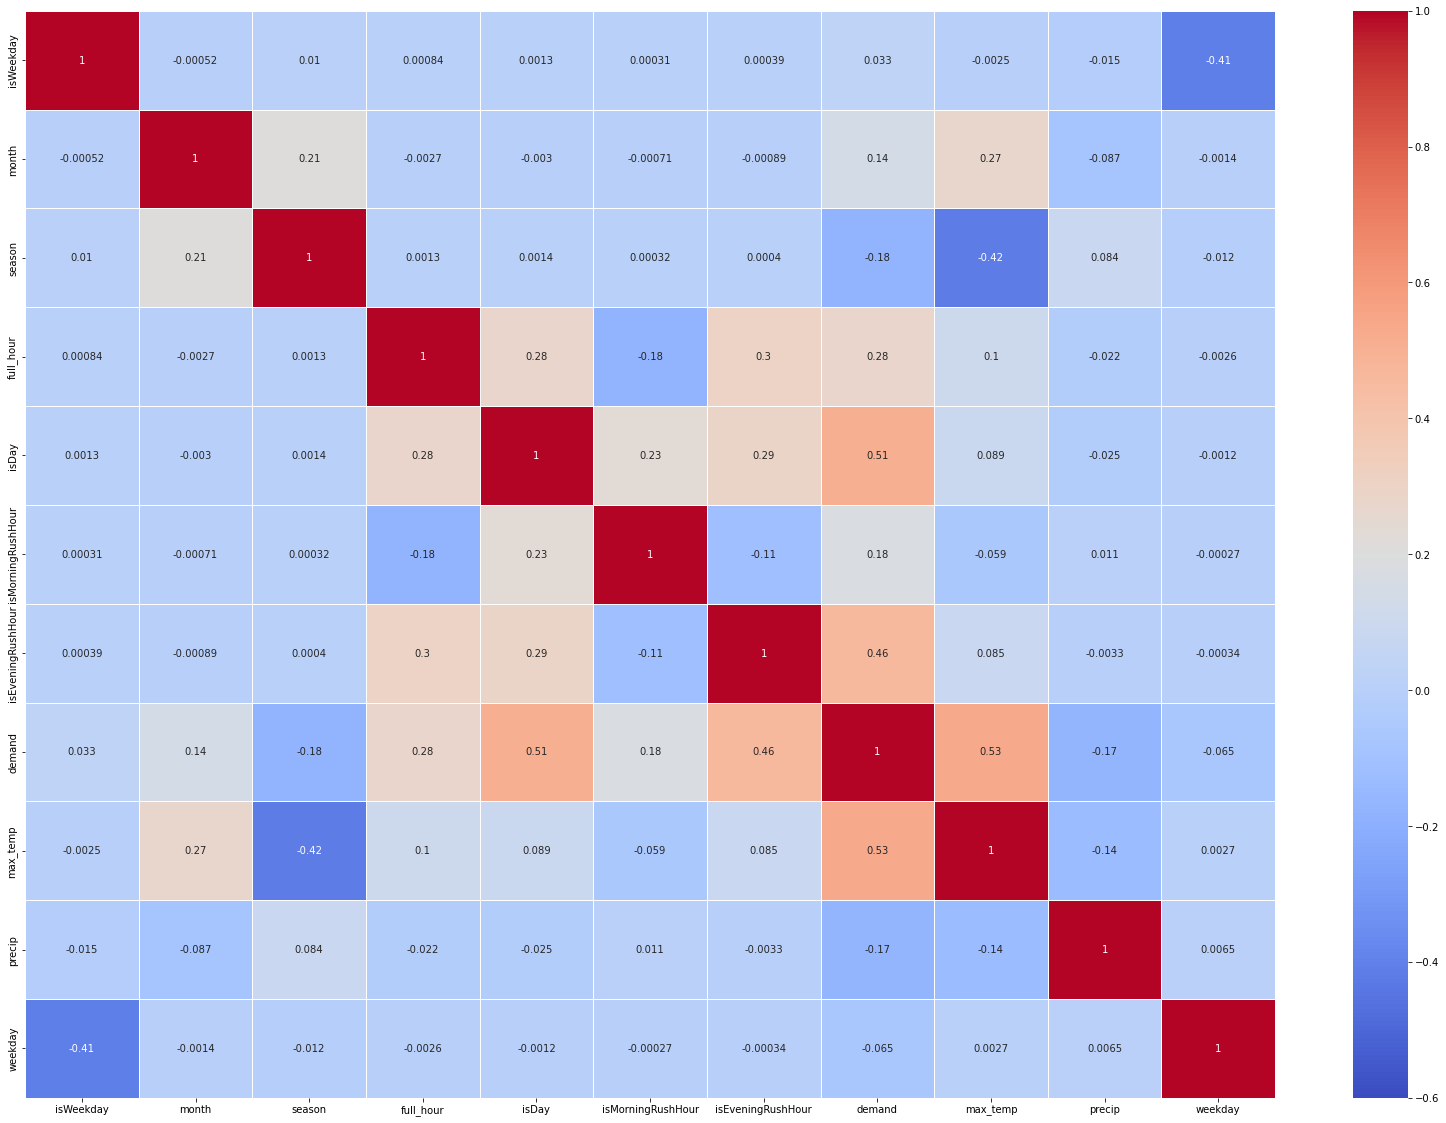

In [25]:
# feature correleation bike_set
plt.figure(figsize = (28,20))
ax= sns.heatmap(bike_predictive_final.corr(), annot = True, cmap="coolwarm",linewidth =1,vmin=-0.6, vmax=1)
plt.show()

We can not see any important correlation, except between the duration variations, which is obvious.
There is some correlation between max_temp and duration, as well as demand and isDay, demand and isEveningRushHour, demand and max_temp.

##### Relationship of Categorical vs. Continuous Variables

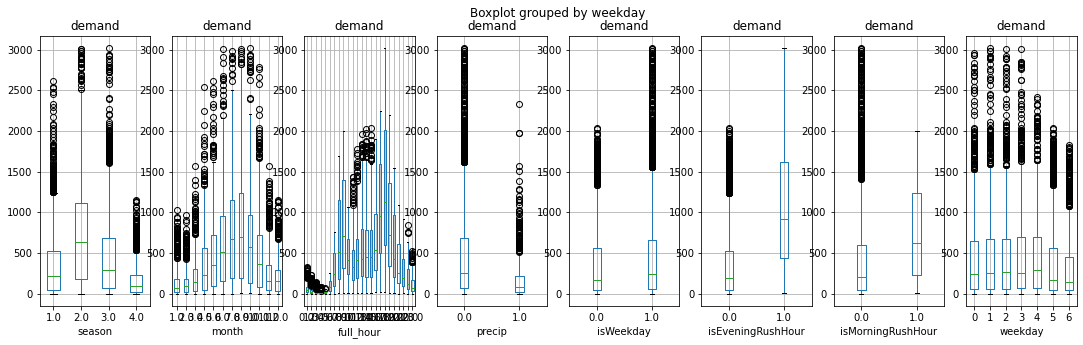

In [26]:
# Box plots for Categorical Target Variable "cnt" and continuous predictors
CategoricalColsList=['season', 'month', 'full_hour', 'precip', 'isWeekday', 'isEveningRushHour', 'isMorningRushHour', 'weekday']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "cnt"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    bike_predictive_final.boxplot(column='demand', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

The plots show the distribution of the dependent variable on the y-axis for each categorical variable on the x-axis. If the distributions look similar for each category (boxes are in the same line), that means that the variables are not correlated.

According to the plots, all of our variables seem to be correlated with the dependent variable 'demand'.

## 4.2. Introduction to Regression Algorithms
The three regression algorithms, we decided to use, are 

**1. (Multi-) linear regression**

**2. Random Forest**

**3. XGBoost**

We agreed on the linear regression as it is a more simplistic model which we also used for electricity demand prediction in the lecture. Secondly, we wanted to use the advantages of ensemble models and therefore chose the Random Forest and XGBoost model. More advantages and drawback can be found in the respective chapters. 

<h2> 4.3 (Multi-) Linear Regression </h2>

Advantages:
* Linear regression is simple to implement and to interpret
* Linear regression is best choice if independent and dependent variables have a linear relationship because of less complexity compared to other algorithms
* needs only low computational performance

Disadvantages:
* needs linearity in data to perform good
* assumes a linear relationship between dependent and independent variables
* assumes independence between attributes
* outliers can have huge effects on the regression and boundaries are linear in this technique
* linear regression looks at a relationship between the mean of the dependent variables and the independent variables. Because of that, linear regression is not a complete description of relationships among variables
* prone to underfitting

<h3> 4.3.1 Define Data Sets </h3>

In [27]:
# define all features desired
regression_X = bike_predictive_final.drop(columns=['demand'])
# define dependent variable demand
regression_Y = bike_predictive_final["demand"]

In [28]:
# First split the data set into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(regression_X, regression_Y, test_size=0.3)

# Then split the train dataset into train (50%) and validation (20% = 0.28571429 * 0,5) data set
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.28571429)

### 4.3.2 Check for Linearity

(Multi-) Linear Regression needs linearity in the data in order to be meaningful.

#### Pairplot of all Features

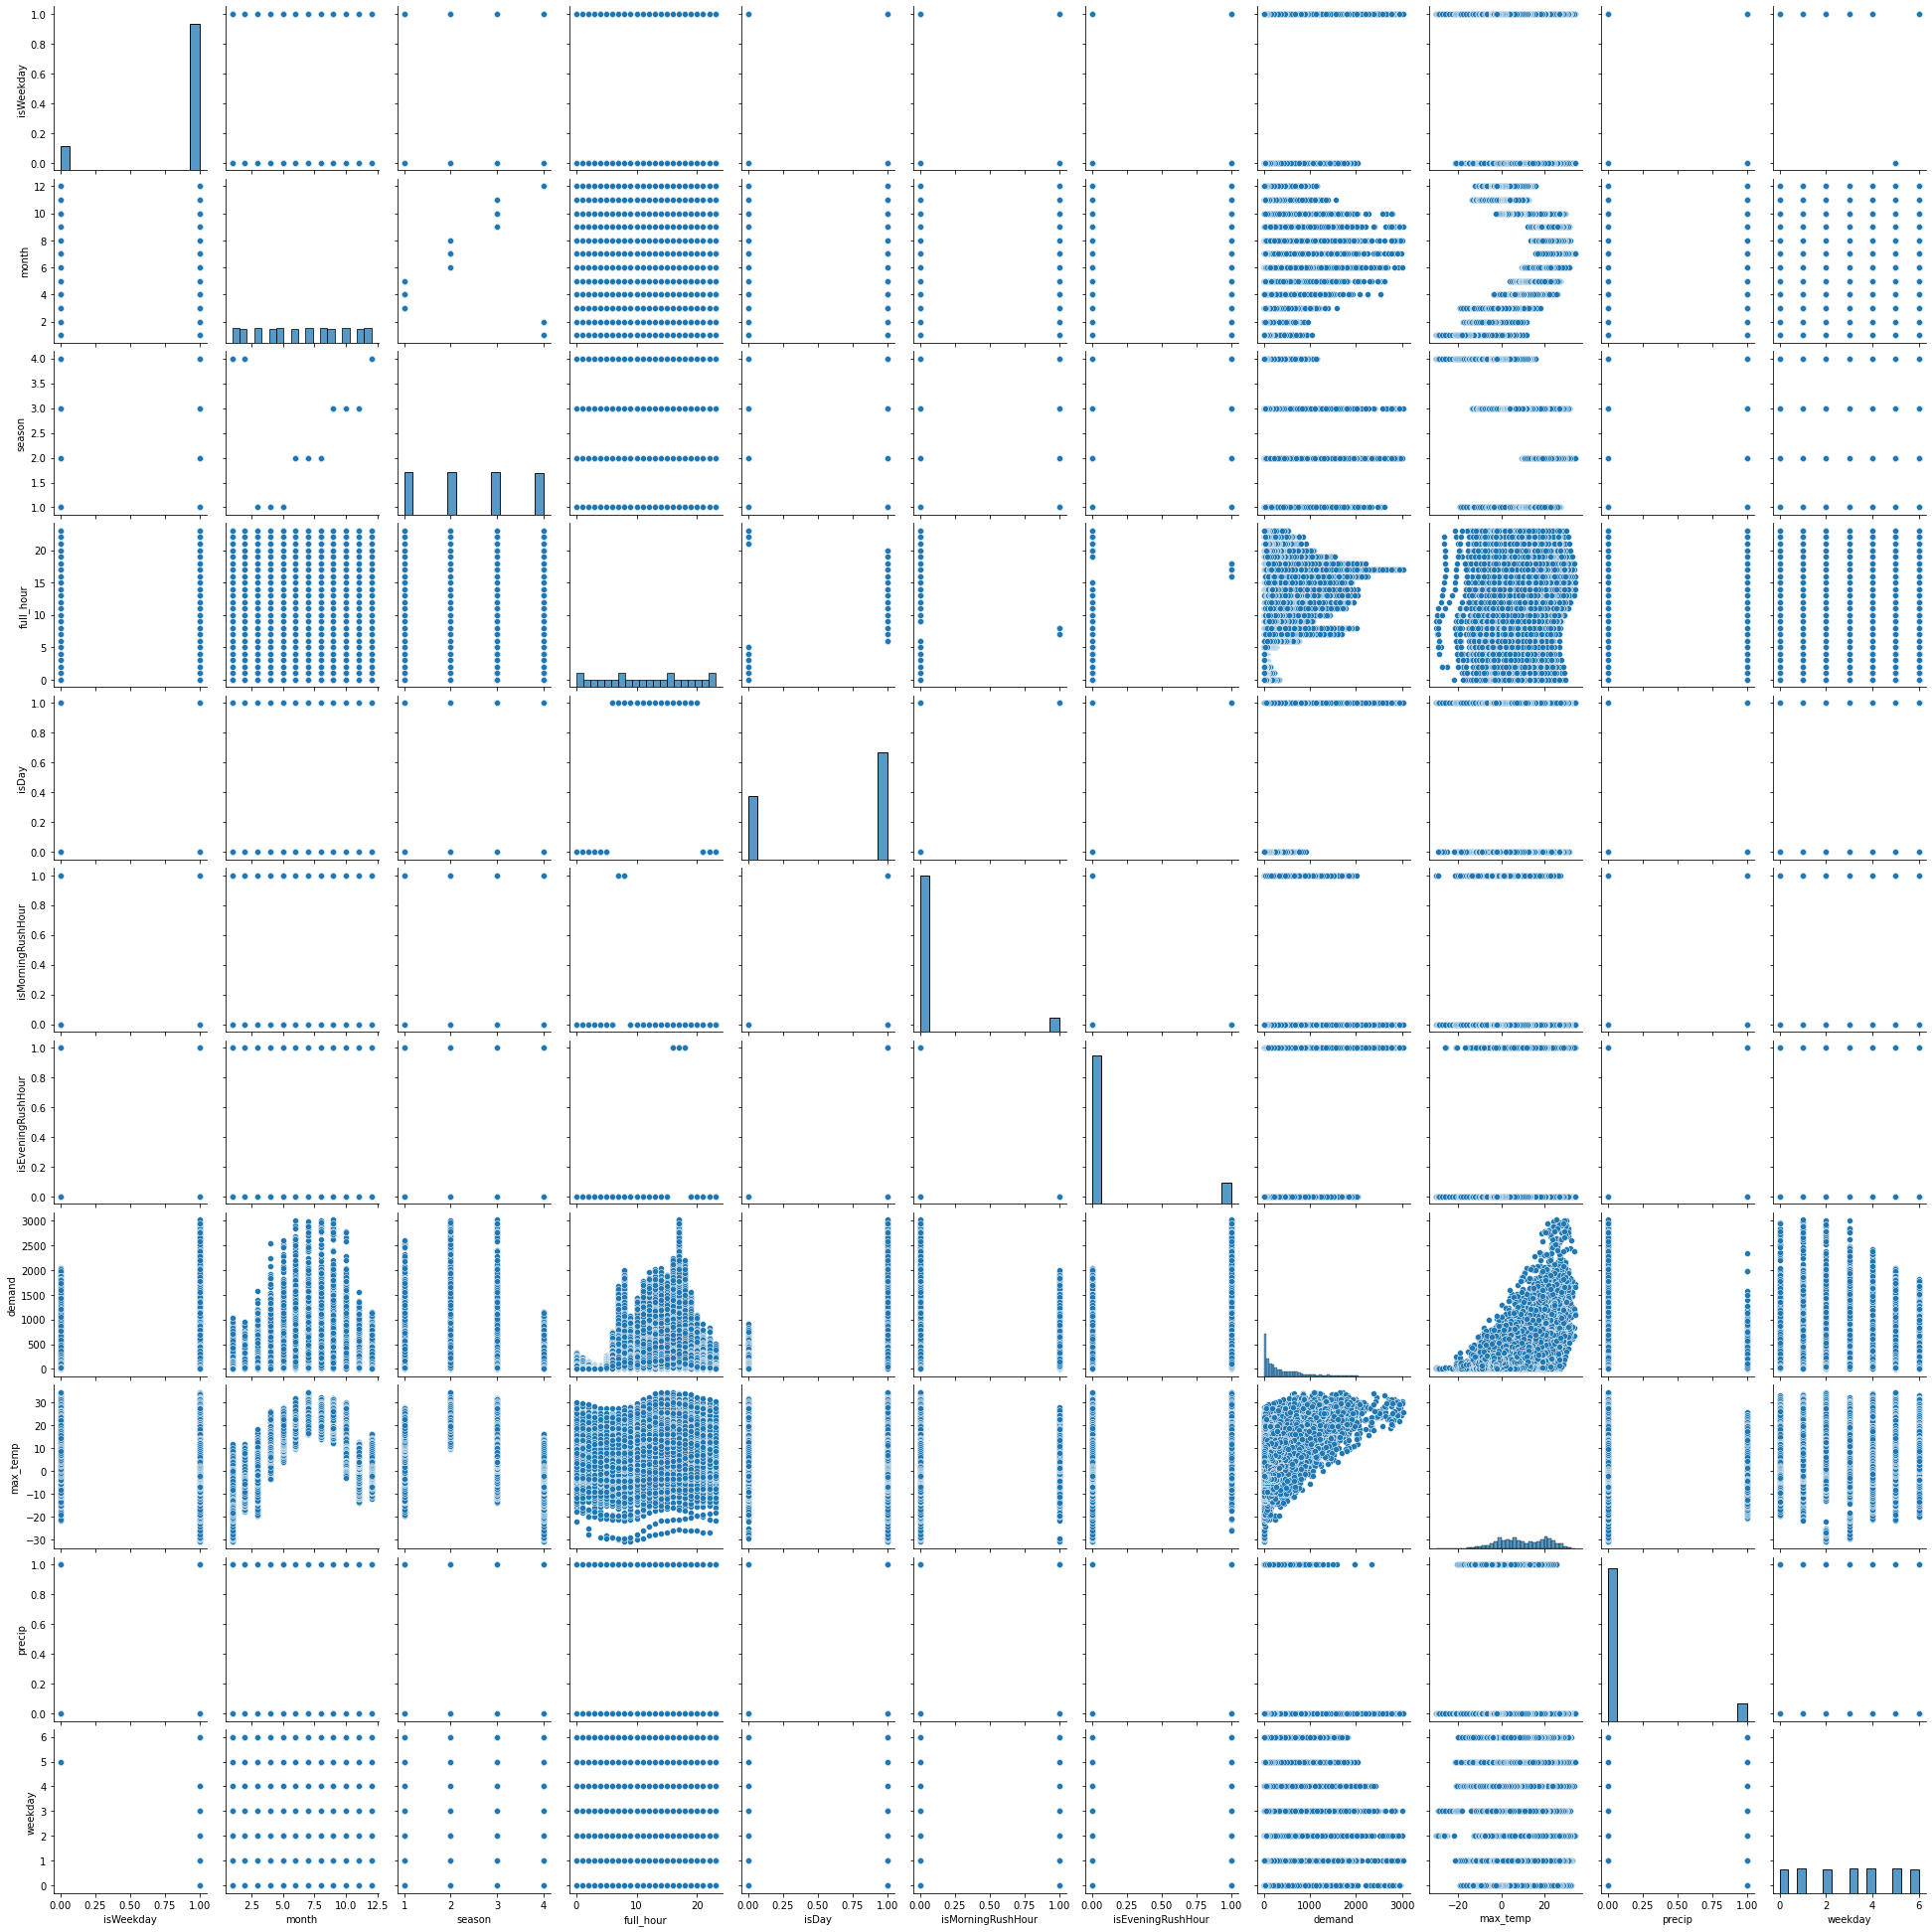

In [29]:
# pairplot of all features
p = sns.pairplot(bike_predictive_final)

#### Pair Plot to Check the Relation of Independent Variables with the Demand (Dependent) Variable

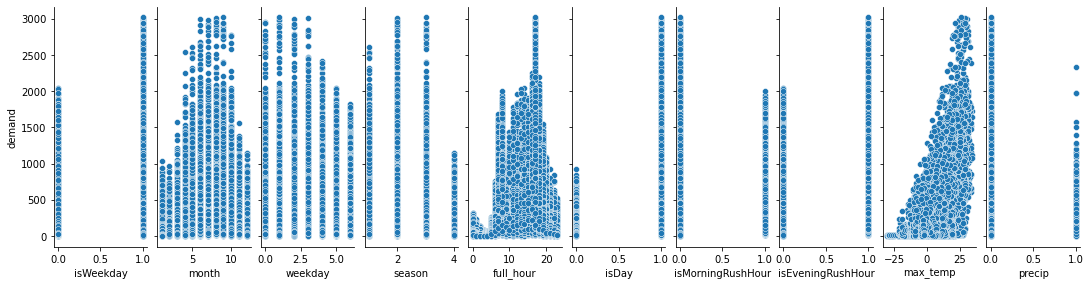

In [30]:
p = sns.pairplot(bike_predictive_final, x_vars=['isWeekday', 'month', 'weekday', 'season', 'full_hour', 'isDay', 'isMorningRushHour', 'isEveningRushHour', 'max_temp', 'precip'], y_vars='demand', size=4, aspect=0.7)
p.fig.set_size_inches(15,4)

#### Result: 
The firs plot shows the relationship for each variable. The second one shows the relationship of the features in relation to the demand. In both plots, we do not observe any linearity, meaning that there is no linearity in our features' relationships.

### 4.3.3 (Simple) Linear Regression

Now, let's get into linear regression. First, we will take a look at simple linear regression even though it is questionable, how helpful the prediction with only one independent variable is, since there are multiple factors influencing bike demand. Since there is no linearity in the features (see above) as well as only one continous numeric feature variable (max_temp), the performance is expected to be not good.

Nevertheless, this could be a good start to dive into linear regression. The results can show the improvement of multilinear regression over simple linear regression later on.

In [31]:
def lin_regression(x):
    
    # regression
    x_train = X_train[x]
    
    model = LinearRegression(fit_intercept =True)
    
    model.fit(x_train.values.reshape(-1,1),y_train)
    model_pred = model.predict(x_train.values.reshape(-1,1))
    
    # visualization
    plt.scatter( x_train, y_train, marker = 'x', c='r')
    xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())

    Z = np.linspace(0,35)
    T = model.intercept_ + model.coef_*Z

    plt.plot(Z,T)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel(x)
    plt.ylabel("Demand")
    plt.show()
    print('linear regression coefficient:', model.coef_)
    print('y-intercept:', model.intercept_)
    print ('The R^2 of linear regression is: ',r2_score(y_train, model_pred)) 

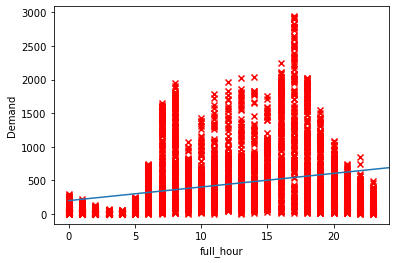

linear regression coefficient: [20.21967601]
y-intercept: 200.505117461756
The R^2 of linear regression is:  0.0769759474938344


In [32]:
lin_regression("full_hour")

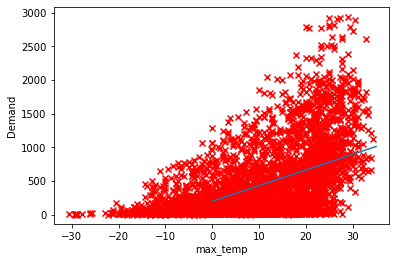

linear regression coefficient: [23.22606834]
y-intercept: 199.09933509091428
The R^2 of linear regression is:  0.2842573817423619


In [33]:
lin_regression("max_temp")

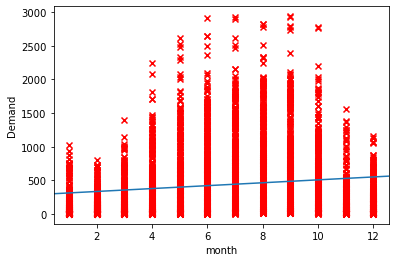

linear regression coefficient: [21.59703639]
y-intercept: 291.2917587313966
The R^2 of linear regression is:  0.021458559859412252


In [34]:
lin_regression("month")

##### Results
Here, we looked exemplary on three independent variables, namely full_hour, max_temp and month.
As we can see, the performance of simple linear regression with only one feature is not good. The r^2 value ranges from 0.02 to 0.28.
We will see, that with Mutli Linear Regression, results will improve drastically in comparison.

### 4.3.4 Multi Linear Regression

Now we will look at Multi-Linear Regression, meaning that we use Linear Regression like we did above, but now with multiple independent variables. With that, the predictions should drastically improve compared to simple linear regression.

In [35]:
def multi_linear(a):
    
    # regression
    # trim X_train and X_val do desired features
    X_train1 = X_train[a]
    X_val1 = X_val[a]
    
    # Create linear regression model
    lin_mod = LinearRegression()
    # Fit it
    lin_mod.fit(X_train1, y_train)
    # Predict the validation data
    y_pred = lin_mod.predict(X_val1)
    
    # metrics
    print('---------------------------------')
    print("R^2 for Train = %.4f" % lin_mod.score(X_train1, y_train))
    print("R^2 for Validation = %.4f" % r2_score(y_val, y_pred))
    print("MAE = %.4f " % mean_absolute_error(y_val, y_pred))
    print("MSE = %.4f " % mean_squared_error(y_val, y_pred))
    print("RMSE = %.4f " % np.sqrt(mean_squared_error(y_val, y_pred)))
    print("MAPE = %.4f " % (mean_absolute_percentage_error(y_val, y_pred)))
    print('---------------------------------')
    mlr_diff = pd.DataFrame({'Actual value': y_val, 'Predicted value': y_pred})
    print(mlr_diff.head())
    print('---------------------------------')
    print('linear regression coefficients:', lin_mod.coef_)
    print('y-intercept:', lin_mod.intercept_)
    print('---------------------------------')
    
    # Visualization #
    
    # Plotting Actual vs Predicted Demand
    fig,ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(20)
    l1,=ax.plot(range(len(y_val)),y_val)
    l2, = ax.plot(range(len(y_pred)),y_pred)
    plt.legend([l1,l2],['Actual','Predicted'])
    plt.title('Predicted vs. Actual Demand', fontsize= 18)
    plt.ylabel('Demand')
    plt.xticks([])
    plt.show()
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14,4))

    # First, plot the values for actual and predicted demand
    ax[0].scatter(y_val, y_pred)
    ax[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)  # Plot a line for the optimal prediction values
    ax[0].set_xlabel("Actual demanded values")
    ax[0].set_ylabel("Predicted demand")
    ax[0].set_title("Comparison of actual vs predicted values for demand on the test set")

    # Next, plot the actual difference between both values
    ax[1].plot(y_val-y_pred, marker = 'o', linestyle = '')
    ax[1].set_xlabel("ID of data point")
    ax[1].set_ylabel("Difference (actual - predicted)")
    ax[1].set_title("Distribution of absolute difference between actual and predicted demand values")

    fig.tight_layout()

#### Model 1: Testing all Features

---------------------------------
R^2 for Train = 0.6433
R^2 for Validation = 0.6342
MAE = 222.9626 
MSE = 100103.8824 
RMSE = 316.3920 
MAPE = 5.6459 
---------------------------------
      Actual value  Predicted value
5204          2023      1431.883114
8325           140       206.968300
2621           364       547.436810
72              15       -86.228301
3849            51       264.942954
---------------------------------
linear regression coefficients: [ 2.82758602e+01 -3.05274745e-01  1.20908566e+01  4.87043355e+00
  3.30582259e+02 -1.62807066e+01  3.49070966e+02  5.05375533e+02
  2.10280271e+01 -1.56556097e+02]
y-intercept: -120.57031655869048
---------------------------------


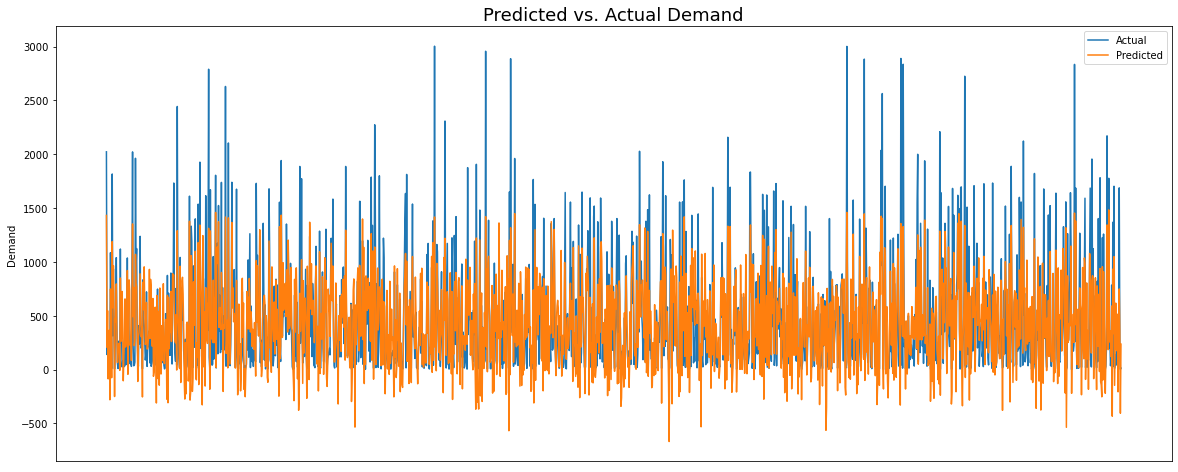

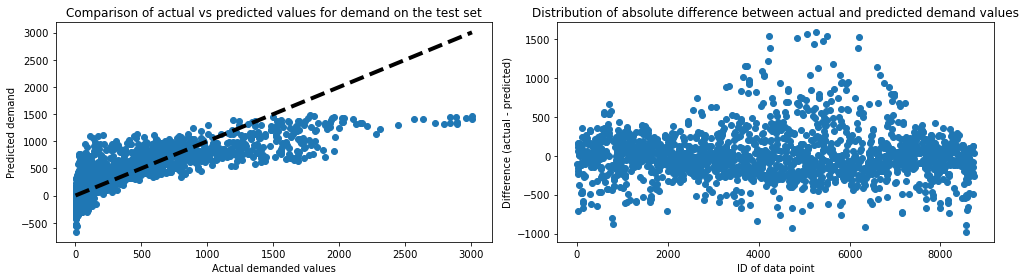

In [36]:
multi_linear(["isWeekday", "month", "season", "full_hour", "isDay", "weekday", "isMorningRushHour", "isEveningRushHour", "max_temp", "precip"])

#### Model 2: Exclude Season

We exclude season, since it should be covered by month

---------------------------------
R^2 for Train = 0.6429
R^2 for Validation = 0.6342
MAE = 222.8920 
MSE = 100099.1113 
RMSE = 316.3844 
MAPE = 5.7103 
---------------------------------
      Actual value  Predicted value
5204          2023      1430.184474
8325           140       204.765572
2621           364       559.311334
72              15      -108.602313
3849            51       264.307306
---------------------------------
linear regression coefficients: [  28.93746946    1.10376742    4.94622581  332.11052724  -16.30883633
  346.85566257  505.72027458   20.41437647 -154.9803544 ]
y-intercept: -95.8640187034647
---------------------------------


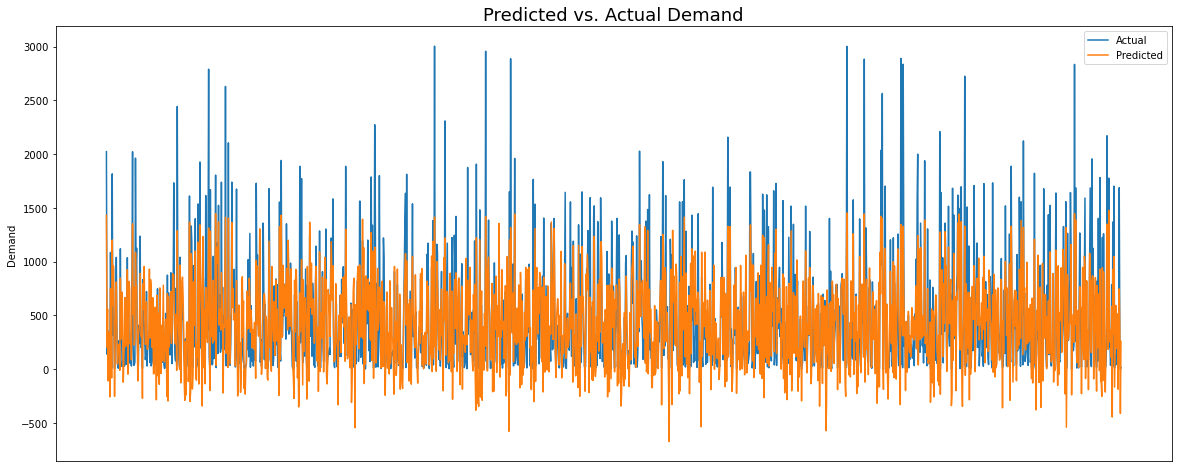

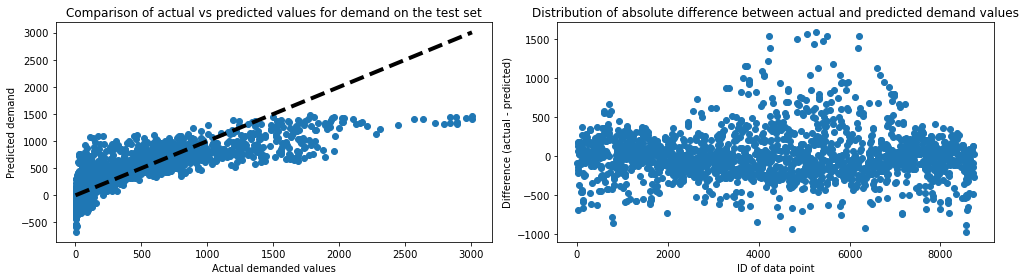

In [37]:
multi_linear(["isWeekday", "month", "full_hour", "isDay", "weekday", "isMorningRushHour", "isEveningRushHour", "max_temp", "precip"])

#### Model 3: Exclude isWeekday as well

We exclude isWeekday, since it should be covered by weekday. The absence of both variables improves our model the most.

---------------------------------
R^2 for Train = 0.6425
R^2 for Validation = 0.6345
MAE = 222.7925 
MSE = 100029.8191 
RMSE = 316.2749 
MAPE = 5.6937 
---------------------------------
      Actual value  Predicted value
5204          2023      1429.874172
8325           140       225.026664
2621           364       580.273394
72              15      -114.155585
3849            51       264.663387
---------------------------------
linear regression coefficients: [   1.03039196    4.93392819  332.11195959  -18.36761993  346.02750755
  505.34629732   20.42077899 -155.24594095]
y-intercept: -64.1783538497881
---------------------------------


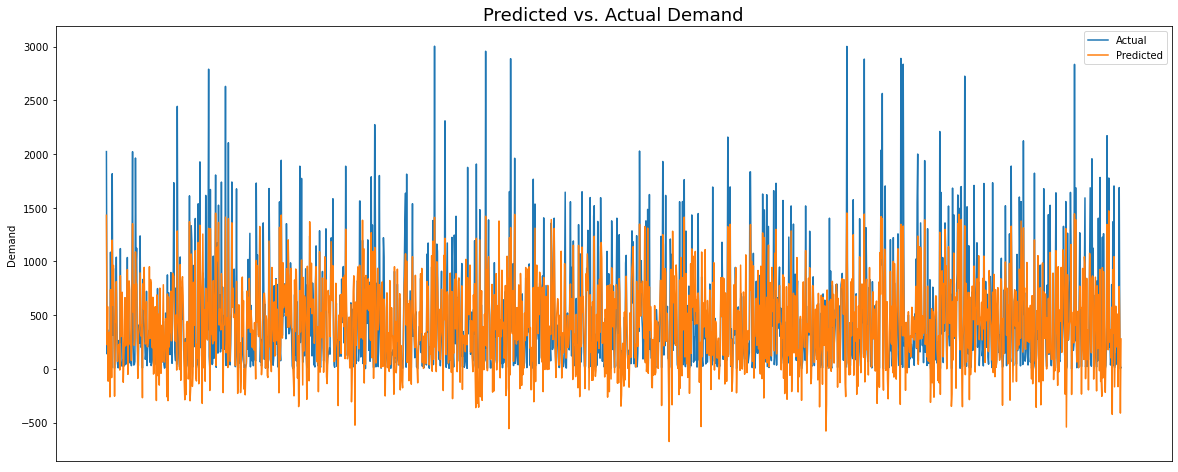

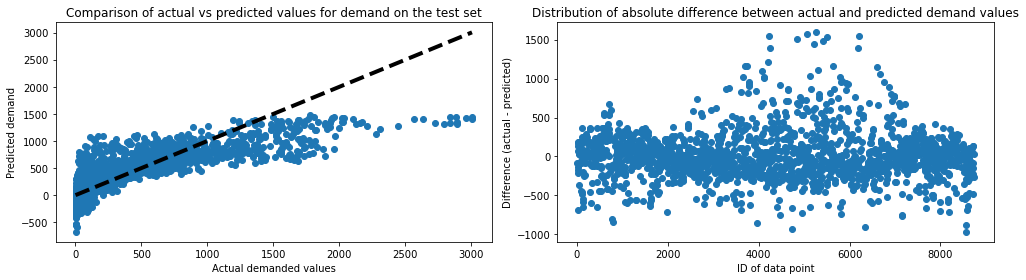

In [38]:
multi_linear(["month", "full_hour", "isDay", "weekday", "isMorningRushHour", "isEveningRushHour", "max_temp", "precip"])

##### Results
All five models do not differ much in their results. We decide to use model 3, since it makes sense to exclude isWeekday, since it should be covered by weekday, and season, because it should be covered by month (you could also go the other way around and include season and exclude month - results do not differ much). In addition to that, it makes the model a bit simpler due to less variables.

Our results show that linear regression clearly underfits our data, which is expected when applying linear regression to non-linear data.

### 4.3.5 Polynomial Regression

Since (Multi-) Linear Regression did not deliver very good results (as expected), we will now look at Polynomial Regression. We take the variables from our best performing model from Multi Linear Regression and see, how it will perform here. (We also tested other different feature combinations, but our features from the multi linear Model still perform best).

In [39]:
def polynomial_reg(a, d):

    # Polynomial Regression and Degree
    poly_reg = PolynomialFeatures(degree=d)

    # Transform
    poly_X_train = poly_reg.fit_transform(X_train[a])
    poly_X_val = poly_reg.fit_transform(X_val[a])

    # Select Model
    lin_mod = LinearRegression()

    # Fit
    lin_mod.fit(poly_X_train, y_train)

    # Predict
    y_pred = lin_mod.predict(poly_X_val)
    
    # Metrics

    print('---------------------------------')
    print("R^2 for Train = %.4f" % lin_mod.score(poly_X_train, y_train))
    print("R^2 for Validation = %.4f" % r2_score(y_val, y_pred))
    print("MAE = %.4f " % mean_absolute_error(y_val, y_pred))
    print("MSE = %.4f " % mean_squared_error(y_val, y_pred))
    print("RMSE = %.4f " % np.sqrt(mean_squared_error(y_val, y_pred)))
    print("MAPE = %.4f " % (mean_absolute_percentage_error(y_val, y_pred)))
    print('---------------------------------')
    print('Chosen degree:', d)
    print('---------------------------------')
    print("Prediction = ",lin_mod.predict(poly_X_val))
    print('---------------------------------')
    #print('regression coefficients:', lin_mod.coef_)
    print('y-intercept:', lin_mod.intercept_)
    print('---------------------------------')
 
    
    # Visualization
    # Plotting Actual vs Predicted No of rentals 
    fig,ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(20)
    l1,=ax.plot(range(len(y_val)),y_val)
    l2, = ax.plot(range(len(y_pred)),y_pred)
    plt.legend([l1,l2],['Actual','Predicted'])
    plt.title('Predicted vs. Actual Demand', fontsize= 18)
    plt.ylabel('Demand')
    plt.xticks([])
    plt.show()
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14,4))

    # First, plot the values for actual and predicted demand
    ax[0].scatter(y_val, y_pred)
    ax[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)  # Plot a line for the optimal prediction values
    ax[0].set_xlabel("Actual demanded values")
    ax[0].set_ylabel("Predicted demand")
    ax[0].set_title("Comparison of actual vs predicted values for demand on the test set")

    # Next, plot the actual difference between both values
    ax[1].plot(y_val-y_pred, marker = 'o', linestyle = '')
    ax[1].set_xlabel("ID of data point")
    ax[1].set_ylabel("Difference (actual - predicted)")
    ax[1].set_title("Distribution of absolute difference between actual and predicted demand values")

    fig.tight_layout()

##### Hyperparameter Testing: Degree

Now, we will look, which degree should be chosen for the best results. The best degree depends on the best r^2 on the valiadtion set. Due to computing limitations, we only consider degrees 2 to 10 (for all degrees higher than 5, prediction gets much worse). 

NOTE: the hyperparameter check takes some time.

In [42]:
def poly_hyperparam_check(features):
    
    best_r_val = 0
    best_r_val_deg = 0
    
    current_r_train = 0
    current_mae = 0
    best_degree = 0

    for i in range(2,11):
        poly_reg = PolynomialFeatures(degree=i)
        poly_X_train = poly_reg.fit_transform(X_train[features])
        poly_X_val = poly_reg.fit_transform(X_val[features])

        lin_mod = LinearRegression()

        lin_mod.fit(poly_X_train, y_train)

        y_pred = lin_mod.predict(poly_X_val)
        
        r2_train = lin_mod.score(poly_X_train, y_train)
        r2_val = r2_score(y_val, y_pred)
        
        if r2_val > best_r_val:
            best_r_val = r2_val
            current_r_train = r2_train
         #   current_mar = mae
            best_degree = i
            
    print('best degree:', best_degree)
    print('best r^2 on validation set:', best_r_val)
    print('r^2 on train set:', current_r_train)

In [43]:
poly_hyperparam_check(["month", "full_hour", "isDay", "weekday", "isMorningRushHour", "isEveningRushHour", "max_temp", "precip"])

best degree: 4
best r^2 on validation set: 0.8904855960851483
r^2 on train set: 0.905522665668742


#### Actual Polynomial Model

We choose a degree of 4, based on the hyperparameter testing conducted above.

---------------------------------
R^2 for Train = 0.9055
R^2 for Validation = 0.8905
MAE = 108.7868 
MSE = 29971.3830 
RMSE = 173.1225 
MAPE = 1.5771 
---------------------------------
Chosen degree: 4
---------------------------------
Prediction =  [1921.57858823  135.36653352  488.65499118 ...  192.22362177  -48.87506597
  -10.54109125]
---------------------------------
y-intercept: -51.86457231416716
---------------------------------


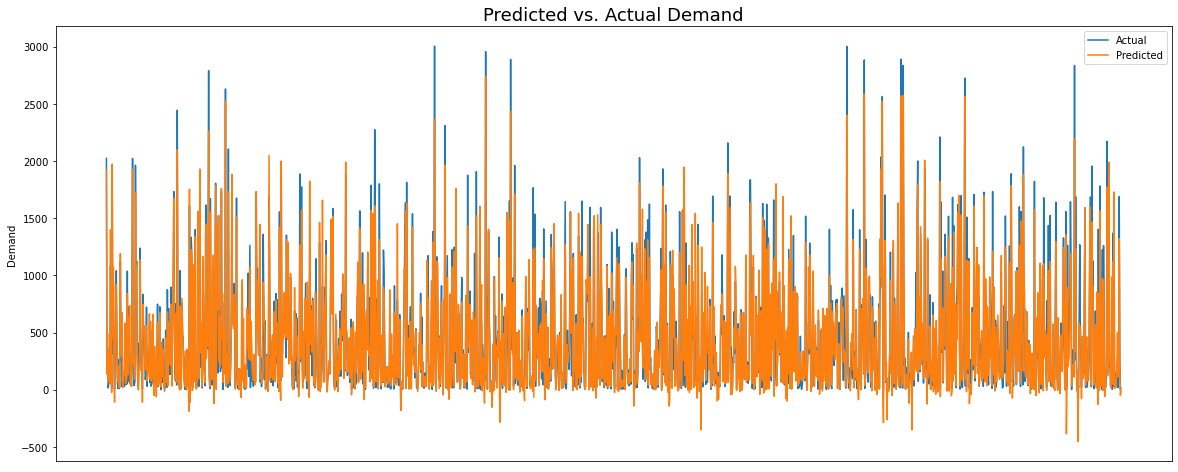

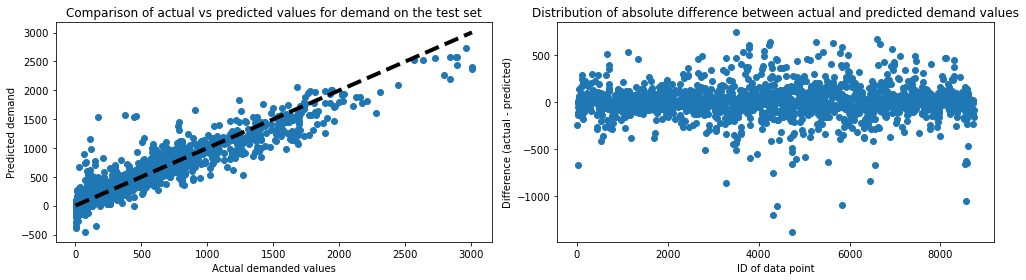

In [45]:
polynomial_reg(["month", "full_hour", "isDay", "weekday", "isMorningRushHour", "isEveningRushHour", "max_temp", "precip"], 4)

##### Result:
When we take a look at the plots (as well as the printed metrics), we see a big improvement over Linear Regression, especially in wrong predictions below zero (negative predicition), now occuring less often. In addition, now our data do not underfit as much anymore.

### 4.3.6 Regularization

Now, we will take a look at out model's performance with regularization. We will explore both L1 and L2 regularization.

#### Ridge Regression (𝐿2 Regularization)

In [46]:
def ridge_regression(alph, degr, features):
    
    # polynomial regression and degree
    Poly = PolynomialFeatures(degree = degr)

    # transform
    poly_X_train = Poly.fit_transform(X_train[features])
    poly_X_val = Poly.fit_transform(X_val[features])
    
    # select model and hyperparameter
    model_L2 = Ridge(alpha = alph, normalize = True, solver = 'lsqr')

    # fit
    model_L2.fit(poly_X_train, y_train)
    
    # predict
    y_pred = model_L2.predict(poly_X_val)

    # metrics
    print('---------------------------------')
    print("R^2 for Train = %.4f" % model_L2.score(poly_X_train, y_train))
    print("R^2 for Validation = %.4f" % r2_score(y_val, y_pred))
    print("MAE = %.4f " % mean_absolute_error(y_val, y_pred))
    print("MSE = %.4f " % mean_squared_error(y_val, y_pred))
    print("RMSE = %.4f " % np.sqrt(mean_squared_error(y_val, y_pred)))
    print("MAPE = %.4f " % (mean_absolute_percentage_error(y_val, y_pred)))
    print('---------------------------------')
    print('Predicted:', y_pred)
    print("Coefficients ", model_L2.coef_, "\nIntercept ", model_L2.intercept_ )
    print('---------------------------------')
    
    # Visualization
    # Plotting Actual vs Predicted No of rentals 
    fig,ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(20)
    l1,=ax.plot(range(len(y_val)),y_val)
    l2, = ax.plot(range(len(y_pred)),y_pred)
    plt.legend([l1,l2],['Actual','Predicted'])
    plt.title('Predicted vs. Actual Demand', fontsize= 18)
    plt.ylabel('Demand')
    plt.xticks([])
    plt.show()
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14,4))

    # First, plot the values for actual and predicted demand
    ax[0].scatter(y_val, y_pred)
    ax[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)  # Plot a line for the optimal prediction values
    ax[0].set_xlabel("Actual demanded values")
    ax[0].set_ylabel("Predicted demand")
    ax[0].set_title("Comparison of actual vs predicted values for demand on the test set")

    # Next, plot the actual difference between both values
    ax[1].plot(y_val-y_pred, marker = 'o', linestyle = '')
    ax[1].set_xlabel("ID of data point")
    ax[1].set_ylabel("Difference (actual - predicted)")
    ax[1].set_title("Distribution of absolute difference between actual and predicted demand values")

    fig.tight_layout()

###### Ridge Hyperparameter Test to Choose best Alpha and Degree
Let us look at the optimal alpha and degree for Ridge Regression. Due to computation limits, the possible alphas are [0.1, 0.2, 0.5, 0,8, 1, 2, 5, 10, 20, 30, 100] and the possible degrees range from 2 to 10. 

NOTE: the calculation takes some time.

In [47]:
def ridge_hyperparam_test(features):
    
    # alphas that will be tested
    alphas = [0.1, 0.2, 0.5, 0,8, 1, 2, 5, 10, 20, 30, 100]
    
    best_alpha = 0
    best_r_val = 0
    current_r_train = 0
    best_degree = 0
    
    for i in range(2,11):
        for k in range(len(alphas)):
            Poly = PolynomialFeatures(degree = i)

            poly_X_train = Poly.fit_transform(X_train[features])
            poly_X_val = Poly.fit_transform(X_val[features])
    
            model_L2 = Ridge(alpha = alphas[k], normalize = True, solver = 'lsqr')

            model_L2.fit(poly_X_train, y_train)
            y_pred = model_L2.predict(poly_X_val)
            
            r2_train = model_L2.score(poly_X_train, y_train)
            r2_val = r2_score(y_val, y_pred)
            
            if r2_val > best_r_val:
                best_r_val = r2_val
                current_r_train = r2_train
                best_degree = i
                best_alpha = alphas[k]
    
    print('best degree:', best_degree)
    print('best alpha:', best_alpha)
    print('best r^2 on validation set:', best_r_val)
    print('r^2 on train set:', current_r_train)

In [48]:
ridge_hyperparam_test(["month", "full_hour", "isDay", "weekday", "isMorningRushHour", "isEveningRushHour", "max_temp", "precip"])

best degree: 9
best alpha: 0
best r^2 on validation set: 0.8813833828221951
r^2 on train set: 0.9090875952492325


##### Use Alpha and Degree on Model

---------------------------------
R^2 for Train = 0.9033
R^2 for Validation = 0.8613
MAE = 108.1038 
MSE = 35430.8330 
RMSE = 188.2308 
MAPE = 0.9877 
---------------------------------
Predicted: [1171.90295166   64.7562077    56.85773716 ...  471.14146046  347.61255135
   18.99701256]
Coefficients  [ 0.          2.15004795  1.77679903 ... -0.01192978  0.05637902
 -1.4889348 ] 
Intercept  21.62078238972748
---------------------------------


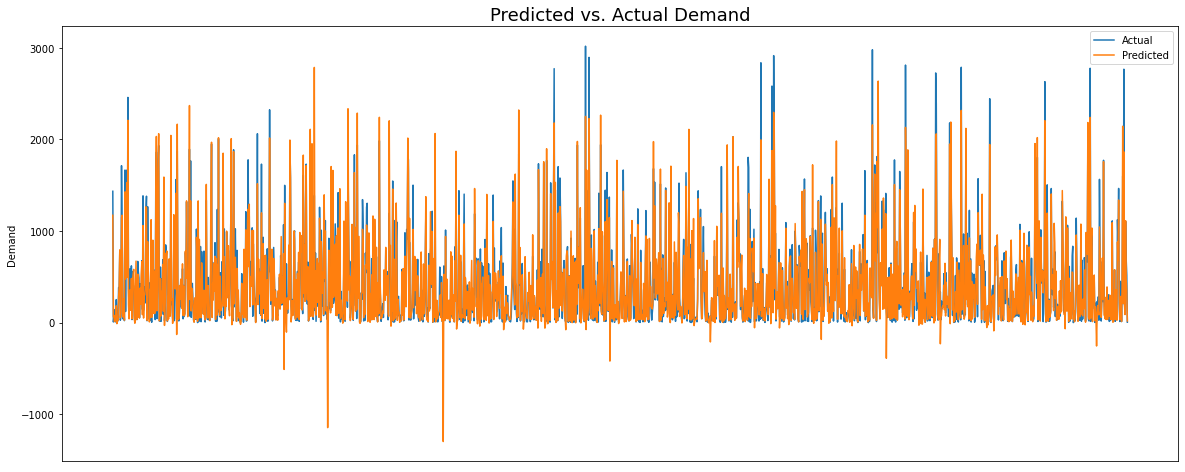

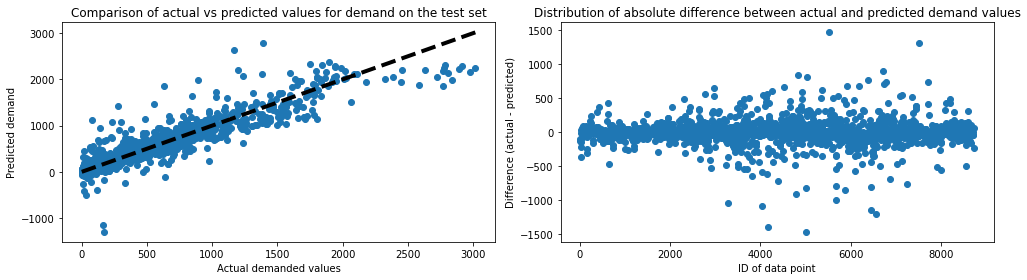

In [268]:
ridge_regression(0, 9, ["month", "full_hour", "isDay", "weekday", "isMorningRushHour", "isEveningRushHour", "max_temp", "precip"])

#### Lasso Regression (𝐿1 regularization)

In [50]:
def lasso_reg(alph, degr, features):
    
    # polynomial regression and degree
    poly_reg = PolynomialFeatures(degree=degr)
    
    # transform
    poly_X_train = poly_reg.fit_transform(X_train[features])
    poly_X_val = poly_reg.fit_transform(X_val[features])
    
    # select model and alpha
    model_L1 = Lasso(alpha = alph)

    # fit
    model_L1.fit(poly_X_train, y_train)
    
    #predict
    y_pred = model_L1.predict(poly_X_val)

    # metrics
    print('---------------------------------')
    print("R^2 for Train = %.4f" % model_L1.score(poly_X_train, y_train))
    print("R^2 for Validation = %.4f" % r2_score(y_val, y_pred))
    print("MAE = %.4f " % mean_absolute_error(y_val, y_pred))
    print("MSE = %.4f " % mean_squared_error(y_val, y_pred))
    print("RMSE = %.4f " % np.sqrt(mean_squared_error(y_val, y_pred)))
    print("MAPE = %.4f " % (mean_absolute_percentage_error(y_val, y_pred)))
    print('---------------------------------')
    print('Predicted:', y_pred)
    print("Coefficients ", model_L1.coef_, "\nIntercept ", model_L1.intercept_ )
    print('---------------------------------')
    
    # Visualization
    # Plotting Actual vs Predicted No of rentals 
    fig,ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(20)
    l1,=ax.plot(range(len(y_val)),y_val)
    l2, = ax.plot(range(len(y_pred)),y_pred)
    plt.legend([l1,l2],['Actual','Predicted'])
    plt.title('Predicted vs. Actual Demand', fontsize= 18)
    plt.ylabel('Demand')
    plt.xticks([])
    plt.show()
    
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14,4))

    # First, plot the values for actual and predicted demand
    ax[0].scatter(y_val, y_pred)
    ax[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)  # Plot a line for the optimal prediction values
    ax[0].set_xlabel("Actual demanded values")
    ax[0].set_ylabel("Predicted demand")
    ax[0].set_title("Comparison of actual vs predicted values for demand on the test set")

    # Next, plot the actual difference between both values
    ax[1].plot(y_val-y_pred, marker = 'o', linestyle = '')
    ax[1].set_xlabel("ID of data point")
    ax[1].set_ylabel("Difference (actual - predicted)")
    ax[1].set_title("Distribution of absolute difference between actual and predicted demand values")

    fig.tight_layout()

###### Lasso Hyperparameter Test to Choose best Alpha and Degree

Again, we now look at the optimal alpha and degree, but now for Lasso Regression. Due to computation limits, the possible alphas are [0.1, 0.2, 0.5, 0,8, 1, 2, 5, 10, 20, 30, 100] and the possible degrees range from 2 to 9. 

NOTE: this calculation also takes some time.

In [271]:
def lasso_hyperparam_test(features):
    
    # selectable alphas
    alphas = [0.1, 0.2, 0.5, 0,8, 1, 2, 5, 10, 20, 30, 100]
    
    best_alpha = 0
    best_r_val = 0
    current_r_train = 0
    best_degree = 0
    
    for i in range(2,10):
        for k in range(len(alphas)):
            Poly = PolynomialFeatures(degree = i)

            poly_X_train = Poly.fit_transform(X_train[features])
            poly_X_val = Poly.fit_transform(X_val[features])
    
            model_L1 = Lasso(alpha = alphas[k])

            model_L1.fit(poly_X_train, y_train)
            y_pred = model_L1.predict(poly_X_val)
            
            r2_train = model_L1.score(poly_X_train, y_train)
            r2_val = r2_score(y_val, y_pred)
            
            if r2_val > best_r_val:
                best_r_val = r2_val
                current_r_train = r2_train
                best_degree = i
                best_alpha = alphas[k]
    
    print('best degree:', best_degree)
    print('best alpha:', best_alpha)
    print('best r^2 on validation set:', best_r_val)
    print('r^2 on train set:', current_r_train)

In [272]:
lasso_hyperparam_test(["month", "full_hour", "isDay", "weekday", "isMorningRushHour", "isEveningRushHour", "max_temp", "precip"])

best degree: 7
best alpha: 20
best r^2 on validation set: 0.8788019942820854
r^2 on train set: 0.9073437698193438


##### Use Alpha and Degree on Model

---------------------------------
R^2 for Train = 0.9073
R^2 for Validation = 0.8788
MAE = 103.8987 
MSE = 30950.5700 
RMSE = 175.9277 
MAPE = 1.1785 
---------------------------------
Predicted: [1166.89635598   67.68460092   73.71115087 ...  447.21907039  449.28903229
   45.83015204]
Coefficients  [ 0. -0.  0. ... -0. -0. -0.] 
Intercept  36.105961794631355
---------------------------------


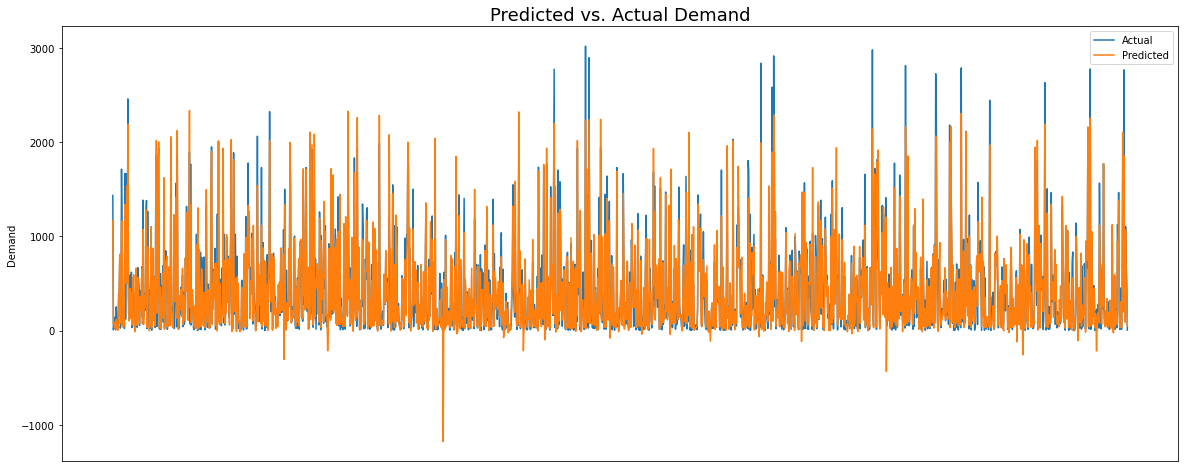

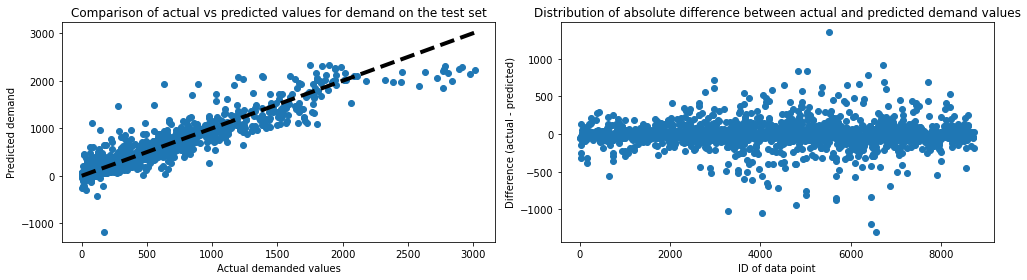

In [273]:
lasso_reg(20, 7, ["month", "full_hour", "isDay", "weekday", "isMorningRushHour", "isEveningRushHour", "max_temp", "precip"])

### 4.3.7 Final Linear Regression Model

Now we will take our best linear regression model and predict with it on the testing set.

According to the results above, the Lasso Regression generates the best results for our chosen input data, with a alpha of 20 and a degree of 7.

---------------------------------
R^2 for Train = 0.9073
R^2 for Test = 0.8710
MAE = 110.8914 
MSE = 33496.1181 
RMSE = 183.0194 
MAPE = 1.1181 
---------------------------------
Predicted: [ 34.6854581  206.12455118  69.29013686 ...  44.56200385 367.52777424
 375.38465224]
Coefficients  [ 0. -0.  0. ... -0. -0. -0.] 
Intercept  36.105961794631355
---------------------------------


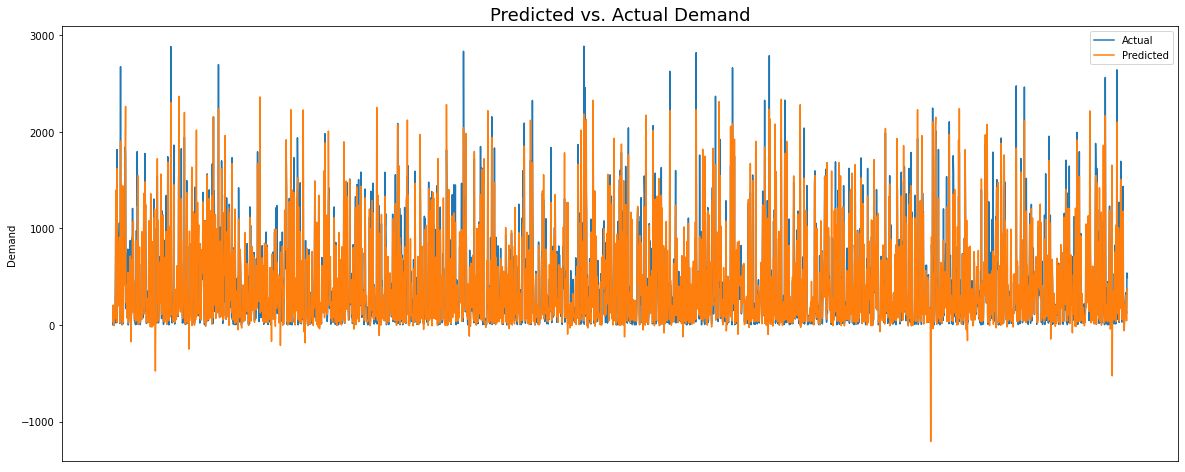

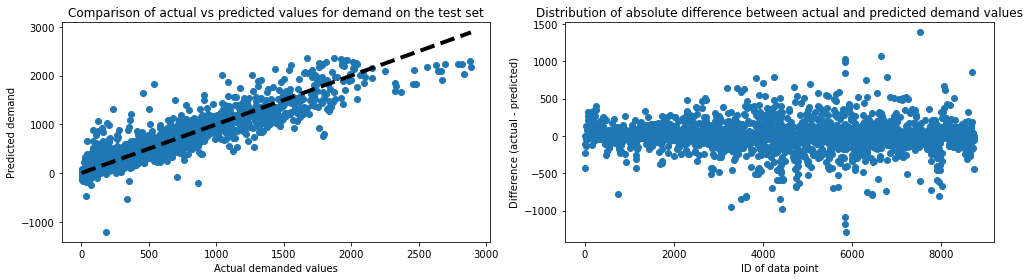

In [275]:
# final l1 regression

features = ["month", "full_hour", "isDay", "weekday", "isMorningRushHour", "isEveningRushHour", "max_temp", "precip"]

#set degree = 7
poly_reg = PolynomialFeatures(degree=7)

# transform
poly_X_train = poly_reg.fit_transform(X_train[features])
poly_X_test = poly_reg.fit_transform(X_test[features])
    
#set alpha = 20
model_L1 = Lasso(alpha = 20)

#fit
model_L1.fit(poly_X_train, y_train)

#predict
y_pred = model_L1.predict(poly_X_test)


# metrics
l1_r2_train = model_L1.score(poly_X_train, y_train)
l1_r2_test = r2_score(y_test, y_pred)
l1_mae = mean_absolute_error(y_test, y_pred)
l1_mse = mean_squared_error(y_test, y_pred)
l1_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
l1_mape = (mean_absolute_percentage_error(y_test, y_pred))

print('---------------------------------')
print("R^2 for Train = %.4f" % model_L1.score(poly_X_train, y_train))
print("R^2 for Test = %.4f" % r2_score(y_test, y_pred))
print("MAE = %.4f " % mean_absolute_error(y_test, y_pred))
print("MSE = %.4f " % mean_squared_error(y_test, y_pred))
print("RMSE = %.4f " % np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE = %.4f " % (mean_absolute_percentage_error(y_test, y_pred)))
print('---------------------------------')
print('Predicted:', y_pred)
print("Coefficients ", model_L1.coef_, "\nIntercept ", model_L1.intercept_ )
print('---------------------------------')
    

# Visualization
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_pred)),y_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs. Actual Demand', fontsize= 18)
plt.ylabel('Demand')
plt.xticks([])
plt.show()
    
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14,4))

# First, plot the values for actual and predicted demand
ax[0].scatter(y_test, y_pred)
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Plot a line for the optimal prediction values
ax[0].set_xlabel("Actual demanded values")
ax[0].set_ylabel("Predicted demand")
ax[0].set_title("Comparison of actual vs predicted values for demand on the test set")

# Next, plot the actual difference between both values
ax[1].plot(y_test-y_pred, marker = 'o', linestyle = '')
ax[1].set_xlabel("ID of data point")
ax[1].set_ylabel("Difference (actual - predicted)")
ax[1].set_title("Distribution of absolute difference between actual and predicted demand values")

fig.tight_layout()

### 4.3.8 Linear and Polynomial Regression Conclusion

A (Simple) Linear Regression does not make any sense in our scenario, because we do not have only one independent variable. The results with only one independent variable show low prediction accuracy with r^2 ranging from 0.02 to 0.2.

As you can see above, Multi Linear Regression improves the results drastically. Model 3 delivers the best performance of all tested models. Here, the independent variables are ["month", "full_hour", "isDay", "weekday", "isMorningRushHour", "isEveningRushHour", "max_temp", "precip"]. But it has to be mentioned that the difference in performance between the tested models is low. All tested models delivered r^2 around 0.6.

Since we do not have any linearity in our data, the low performance of Linear Regression was foreseeable. Because of that, we also took a look on Polynomial Regression. We applied our model 3 from Multi Linear Regression (as well as other feature combinations). The performance got immediately improved and our r^2 increased to about 0.8 to 0.9. In addition to that, we tried regularization with Lasso and Ridge regression. Lasso Regression seems to be most accurate in predicting our demand, with the lowest MAE and highest r^2 for the validation set. With some fine-tunning, results may be improved slightly.

<h2> 4.4 Random Forest </h2>

As another regression algorithm we decided to use the Random Forest. A random forest model is an ensemble method which uses multiple decison trees to make predictions based on a mean computation of all trees. 

Through the multiple decision trees a random forest reduces overfitting in a single one and improves accuracy.  Additionally, we know from the lecture that ensemble methods, such as the random forest, can reduce variance because several predictions are taken into account. Moreover, the algorithm works well with both categorical, e.g. season or isEveningRushHour, and continuous values, like the temperature, because both can be split easily on a node. One last advantage is that random forests do not need feature scaling, like standardization or normalization, as it uses a rule based approach.

However, there are also some drawbacks. Random forests can not longer be interpreted easily because several decison trees are needed and the significance of each feature is hard to determine. For the bike prediction we accepted this disadvantage and also used feature importance to tackle the issue. Another disadvantage is that the method requires more computational power to build and also more time to train numerous trees. In addition, there are multiple hyperparameters which can influence the accurarcy of the model which also means that many combinations need to be tested in order to find the optimal one.

<h3> 4.4.1 Creating a First Model and Improved Feature Engineering </h3>

To avoid duplicate code we create two methods: One for the preparation of the data and the second one for the model building.

In [246]:
def data_preparation_rf(columns):
    
    # Prepare the X and y set by dropping relevant features and selecting the demand for y
    bike_predictive_random_forest_X = bike_predictive_final.drop(columns=columns)
    bike_predictive_random_forest_Y = bike_predictive_final["demand"]
   
    # Split the data into train, validationa and test
    # First split the data set into train (70%) and test (30%)
    X_train, X_test, y_train, y_test = train_test_split(bike_predictive_random_forest_X, bike_predictive_random_forest_Y, test_size=0.3,random_state=42)

    # Then split the train dataset into train (50%) and validation (20% = 0.28571429 * 0,5) data set
    X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.28571429, random_state=42)
    
    return X_train, X_test, X_val, y_train, y_test, y_val

In [247]:
def model_building_rf(X_train, X_test, X_val, y_train, y_test, y_val):
    
    # Create the random forest model
    rf = RandomForestRegressor()
    # Fit it
    rf.fit(X_train, y_train)
    # Predict the validation data
    result = rf.predict(X_val)
    
    # Print out relevant error metrics
    print("R^2 for Train = %.4f" % rf.score(X_train, y_train))
    print("R^2 for Validation = %.4f" % r2_score(y_val, result))
    print("MAE = %.4f " % mean_absolute_error(y_val, result))
    print("MSE = %.4f " % mean_squared_error(y_val, result))
    print("RMSE = %.4f " % np.sqrt(mean_squared_error(y_val, result)))
    print("MAPE = %.4f " % (mean_absolute_percentage_error(y_val, result)))

Now we build our first model

In [248]:
X_train, X_test, X_val, y_train, y_test, y_val = data_preparation_rf(["demand","full_hour","weekday"])
model_building_rf(X_train, X_test, X_val, y_train, y_test, y_val)

R^2 for Train = 0.9039
R^2 for Validation = 0.7435
MAE = 158.8373 
MSE = 65513.0680 
RMSE = 255.9552 
MAPE = 1.4664 


In the first approach we did not select the full hour as a feature because we thought this would be covered by the isDay, isMorningRushHour or isEveningRushHour features. To evaluate this hypothesis, we now add the full_hour as a feature.

In [249]:
X_train, X_test, X_val, y_train, y_test, y_val = data_preparation_rf(["demand","weekday"])
model_building_rf(X_train, X_test, X_val, y_train, y_test, y_val)

R^2 for Train = 0.9585
R^2 for Validation = 0.8209
MAE = 119.5363 
MSE = 45733.7312 
RMSE = 213.8545 
MAPE = 0.6544 


The model improves and now nearly 96% of the variance inside the training set is now explained by the features. So the full_hour feature is definetely improving the model.

On our feature list we also had the exact weekday. However, again we had the hypothesis that the isWeekday feature would cover this. So now we will add this feature and substitute the isWeekday feature with it.

In [250]:
X_train, X_test, X_val, y_train, y_test, y_val = data_preparation_rf(["demand","isWeekday"])
model_building_rf(X_train, X_test, X_val, y_train, y_test, y_val)

R^2 for Train = 0.9881
R^2 for Validation = 0.9212
MAE = 76.2957 
MSE = 20135.2588 
RMSE = 141.8988 
MAPE = 0.4051 


As can be seen the model improves drastically.

Due to the fact that we added the full hour feature earlier, the isDay, isMorningRushHour and isEveningRushHour feature should be obsolete.

In [251]:
X_train, X_test, X_val, y_train, y_test, y_val = data_preparation_rf(["demand","isWeekday","isDay", "isMorningRushHour","isEveningRushHour"])
model_building_rf(X_train, X_test, X_val, y_train, y_test, y_val)

R^2 for Train = 0.9878
R^2 for Validation = 0.9230
MAE = 74.4660 
MSE = 19652.1569 
RMSE = 140.1862 
MAPE = 0.3886 


The values of the R-squared, MSE and RMSE with the three attributes do not differ significantly. Thus, we do not take these features into consideration as we want to build the simplest but best model as possible.

As a last feature evualation we look at the seasons which should also be already represented by the month attribute.

In [252]:
X_train, X_test, X_val, y_train, y_test, y_val = data_preparation_rf(["demand","isWeekday","isDay", "isMorningRushHour","isEveningRushHour","season"])
model_building_rf(X_train, X_test, X_val, y_train, y_test, y_val)

R^2 for Train = 0.9880
R^2 for Validation = 0.9242
MAE = 74.5240 
MSE = 19347.3507 
RMSE = 139.0948 
MAPE = 0.3834 


However, apparently the season does have an impact and results in a slightly better prediction. As it is only one feature and improves the model, we leave the season in.

At the end of this passage we conclude by showing which feature is how important. Here, we can see that the full_hour and max_temp are by far the most important features with more than 35%. This means that 70% of the total reduction in demand is brought by these two features. The weekday still accounts for 10% while the month, precip and season are lower than 5%. 
One possible explanation could be that the seasonality trend of the temperature is also related to the month and thus the month is not so important for the model.

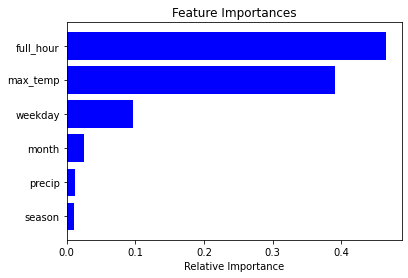

In [253]:
X_train, X_test, X_val, y_train, y_test, y_val = data_preparation_rf(["demand","isWeekday","isDay", "isMorningRushHour","isEveningRushHour"])
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

rf.feature_importances_
# Get the sorted importances of the features
importance_sorted = sorted(zip(rf.feature_importances_, list(X_train)))
feature_values = sorted([i[0] for i in importance_sorted[0:10]])
feature_names = [i[1] for i in importance_sorted[0:10]]

indices = list(range(0,6))

plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_values, color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h3> 4.4.2 Hyperparameter Tuning </h3>

Hyperparameters are beside the features a deciding factor for model performance. In this section we use the validation set for hyperparameter tuning.
In a first attempt we try different values for the **n_estimators** parameter which states how many trees should be in the Random Forest in order to calculate the prediction on the mean of all model outputs. Here, we set a random state for the building of the random forest, in order to be able to compare the different number of estimators more conveniently.

In [206]:
# Array of 40 different estimator values
n_estimators = [int(x) for x in np.linspace(1,1000,num=40)]

random_forests_score_train = []
random_forests_score_test = []

# For each value build and fit the model and save the scores
for estimator in n_estimators:
    rf = RandomForestRegressor(n_estimators = estimator,random_state=0)
    rf.fit(X_train, y_train)
    random_forests_score_train.append(rf.score(X_train, y_train))
    random_forests_score_test.append(rf.score(X_val, y_val))

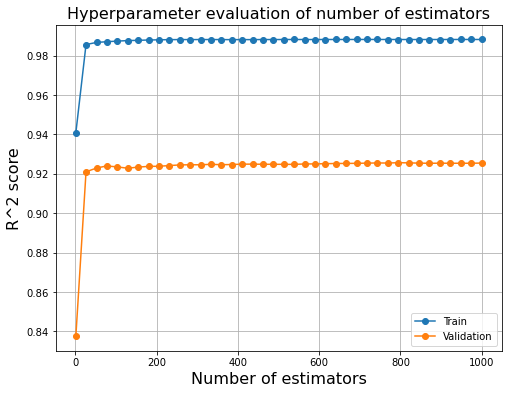

In [207]:
# Plot number of estimators path by using the scores
plt.subplots(figsize=(8,6))
plt.plot(n_estimators, random_forests_score_train, marker='o')
plt.plot(n_estimators, random_forests_score_test, marker='o')
plt.legend(["Train","Validation"])
plt.xlabel("Number of estimators",fontsize=16)
plt.ylabel("R^2 score",fontsize=16)
plt.title("Hyperparameter evaluation of number of estimators",fontsize=16)
plt.grid()
plt.show()

As can be seen the evaluation metric R^2 is at its lowest below approximately 50 estimators for both the test and train data. At around 250 estimators the score does not really change at all, so it would be best to pick the number of trees in the forest as 250.
As can be seen below the model does improve slightly.

In [254]:
rf = RandomForestRegressor(n_estimators=250)
rf.fit(X_train, y_train)
result = rf.predict(X_val)
    
# Print out relevant error metrics
print("R^2 for Train = %.4f" % rf.score(X_train, y_train))
print("R^2 for Validation = %.4f" % r2_score(y_val, result))
print("MAE = %.4f " % mean_absolute_error(y_val, result))
print("MSE = %.4f " % mean_squared_error(y_val, result))
print("RMSE = %.4f " % np.sqrt(mean_squared_error(y_val, result)))
print("MAPE = %.4f " % (mean_absolute_percentage_error(y_val, result)))

R^2 for Train = 0.9881
R^2 for Validation = 0.9240
MAE = 74.2137 
MSE = 19406.0811 
RMSE = 139.3057 
MAPE = 0.3827 


<h3> 4.4.3 Hyperparameter Tuning Using Grid Search </h3>

To facilitate the hyperparameter tuning and not only focus on one single parameter but on different combinations we are implementing a **grid search**. In a grid search, you define a search space in which each dimension represents a hyperparameter and each point represents one model combination.

From the lecture we know that for decision trees the parameters **max_depth** (max numbers of levels in each decision tree), **min_samples_leaf** (min number of data points allowed in a leaf node) and the **alpha for cost complexity** are most important. Moreover, the ensemble method of random forests is most often combined with bagging, that means different bootstrap samples of the training data are used to train the individual trees. Thus, also the **bootstrap** parameter is relevant.

Additionally, the Skikit-Learn documentation on random forests tells us that **n_estimators** (number of trees in the forest), **max_features** (max number of features considered for splitting a node) and **min_samples_split** (min amount of samples required for a split) should also be taken into consideration.

In the following code we first perform a **random grid search** to limit the possible search space for each optimal parameter. Otherwise in a complete grid search there would be way to many combinations for computation. In a random grid search points in the search space are selectet at random. Here we set the number of estimators to 250 as seen above, also to reduce combinations. After that we perform a grid search to then find the optimal values for the aforementioned hyperparameters.

In [255]:
# First create a possible value space for each parameter and put all into one grid (dictionary)
max_depth = [int(x) for x in np.linspace(1,100,num=11)]
min_samples_leaf = [1,2,4,8]
ccp_alpha = np.linspace(0,1,num=5)
bootstrap = [True, False]
n_estimators = [250]
max_features = [4,5,6]
min_samples_split = [2,5,10]

hyperparameter_random_grid = {"max_depth": max_depth, "min_samples_leaf": min_samples_leaf, "ccp_alpha": ccp_alpha, 
                       "bootstrap": bootstrap, "n_estimators": n_estimators, "max_features": max_features,
                       "min_samples_split":min_samples_split}

In [256]:
# Create the random search with the above parameter grid, 3 folds of cross validation and 500 random iterations
random_search = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = hyperparameter_random_grid, 
                           cv = 3, n_jobs = -1, verbose = 4, scoring="r2", n_iter = 500, random_state=42)

random_search.fit(X_train, y_train)
random_search.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


{'n_estimators': 250,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 4,
 'max_depth': 90,
 'ccp_alpha': 0.75,
 'bootstrap': True}

Using the results from the random search, we can now narrow the range of values for each hyperparameter for the more detailed grid search

In [257]:
max_depth = [70,80,90,100]
min_samples_leaf = [1,2]
ccp_alpha = [0.5, 0.6, 0.75]
bootstrap = [True]
n_estimators = [250]
max_features = [4,5]
min_samples_split = [2,3,4]

hyperparameter_grid = {"max_depth": max_depth, "min_samples_leaf": min_samples_leaf, "ccp_alpha": ccp_alpha, 
                       "bootstrap": bootstrap, "n_estimators": n_estimators, "max_features": max_features,
                       "min_samples_split":min_samples_split}

In [258]:
grid_search = GridSearchCV(estimator = RandomForestRegressor(), param_grid = hyperparameter_grid, 
                           cv = 3, n_jobs = -1, verbose = 4, scoring="r2")

grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'bootstrap': True,
 'ccp_alpha': 0.6,
 'max_depth': 90,
 'max_features': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 250}

<h4> Description of optimal values for hyperparameters </h4>

The above values for the hyperparameters are the optimal values for our grid search. In the following table each of them is described and interpreted.

<table>
  <tr>
    <th style="text-align: left">Hyperparameter</th>
    <th style="text-align: left">Description</th>
    <th style="text-align: left">Final Value</th>
    <th style="text-align: left">Interpretation</th>
  </tr>
  <tr>
    <td style="text-align: left"> Bootstrap </td>
    <td style="text-align: left"> Boolean if bootstrap samples are used</td>
    <td style="text-align: left"> True </td>
    <td style="text-align: left"> Bootstrap is used, i.e. that the trees are not fitted on all available data but on data subsets which can reduce the variance</td>
  </tr>
  <tr>
    <td style="text-align: left">Alpha </td>
    <td style="text-align: left">Parameter for regulating the tree size </td>
    <td style="text-align: left"> 0.6</td>
    <td style="text-align: left">Relatively high value, meaning that there is a larger penalty on the tree size </td>
  </tr>
    <tr>
    <td style="text-align: left">Max Depth </td>
    <td style="text-align: left">Maximum depth of three, meaning how many levels of nodes it can have </td>
    <td style="text-align: left"> 90</td>
    <td style="text-align: left"> A tree size of 90 seems relatively high, and overfitting could occur, but the alpha parameter regulates this</td>
  </tr>
    <tr>
    <td style="text-align: left"> Max Features</td>
    <td style="text-align: left">Maximum number of features to split at each node </td>
    <td style="text-align: left">5 </td>
    <td style="text-align: left"> For each split 5 random features of our dataset, which comprises 6 in total, are looked at. In CART all features are taken into account, as CART use a greedy algorithm. However, this results in structural similar trees and as we know ensemble methods work best if the sub-models are uncorrelated. Taking 5 features reduces this problem.</td>
  </tr>
    <tr>
    <td style="text-align: left">Min Samples Leaf </td>
    <td style="text-align: left">Minimum number of samples required in a leaf node
 </td>
    <td style="text-align: left"> 1</td>
    <td style="text-align: left"> One sample in the leaf means that the tree could be recursively partitioned until each sample is in one leaf. This would overfit the data, however the max depth and min samples split reduce that risk</td>
  </tr>
    <tr>
    <td style="text-align: left">Min Samples Split </td>
    <td style="text-align: left"> Minimum number of samples needed to split a node</td>
    <td style="text-align: left">3 </td>
    <td style="text-align: left"> In order to split a node, a minimum number of 3 samples is needed. This can reduce the generalization error, as the tree can not split until each leaf only has one sample.</td>
  </tr>
    <tr>
    <td style="text-align: left">Estimators </td>
    <td style="text-align: left"> Number of trees on which the prediction is calculated based on mean computation</td>
    <td style="text-align: left">250 </td>
    <td style="text-align: left"> 250 decision trees are used, which lies in the typical range of 100 to 1.000 trees and should be sufficient for generalizable prediction</td>
  </tr>
</table>

<h3> 4.4.4 Final Results </h3>

Now we can apply these optimal values to the model prediction. Here we do it first on the validation set and then on the test data.

In [259]:
result_val = grid_search.predict(X_val)
    
# Print out relevant error metrics
print("R^2 for Train = %.4f" % grid_search.score(X_train, y_train))
print("R^2 for Validation = %.4f" % r2_score(y_val, result_val))
print("MAE = %.4f " % mean_absolute_error(y_val, result_val))
print("MSE = %.4f " % mean_squared_error(y_val, result_val))
print("RMSE = %.4f " % np.sqrt(mean_squared_error(y_val, result_val)))
print("MAPE = %.4f " % (mean_absolute_percentage_error(y_val, result_val)))

R^2 for Train = 0.9881
R^2 for Validation = 0.9290
MAE = 73.2911 
MSE = 18126.7231 
RMSE = 134.6355 
MAPE = 0.4308 


This is the final result for the Random Forest model. As can be seen while comparing to the result of the feature engineering process, the hyperparameter tuning did improve the model slighlty and the R-squared value for the validation set is improved by approximately 0.5 percent.

We now predict the model on the test set and come to our final conclusion. Then, to make the results a bit more tangible, the **actual vs predicted demand** is plotted.

In [260]:
result_test_rf = grid_search.predict(X_test)
    
rf_rsquared_train = grid_search.score(X_train, y_train)
rf_rsquared_test = r2_score(y_test, result_test_rf)
rf_mae = mean_absolute_error(y_test, result_test_rf)
rf_mse = mean_squared_error(y_test, result_test_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, result_test_rf))
rf_mape = (mean_absolute_percentage_error(y_test, result_test_rf))
    
# Print out relevant error metrics
print("R^2 for Train = %.4f" % rf.score(X_train, y_train))
print("R^2 for Test = %.4f" % r2_score(y_test, result_test_rf))
print("MAE = %.4f " % mean_absolute_error(y_test, result_test_rf))
print("MSE = %.4f " % mean_squared_error(y_test, result_test_rf))
print("RMSE = %.4f " % np.sqrt(mean_squared_error(y_test, result_test_rf)))
print("MAPE = %.4f " % (mean_absolute_percentage_error(y_test, result_test_rf)))

R^2 for Train = 0.9881
R^2 for Test = 0.9168
MAE = 80.2056 
MSE = 21595.7458 
RMSE = 146.9549 
MAPE = 0.5020 


The final random forest model results in a R-squared value of nearly 92%. This means that 92% of the proportion of the variance in the demand can be accounted for by the model. The mean absolute percentage error gives us the information that each prediction deviates 50% from the actual value on average. 
Because we are only evaluating the hourly demand of one city, absolute regression test metrics can also be applied. The mean absolute error (MAE) is 80.2 which means that in each prediction of the bike demand in one hour, there are 80.2 too many or too less bikes predicted on average. Benchmarking this, the absolute deviation in the model still seems relatively high and the Divvy bike provider would still need to maintain 81 additional bikes which are not needed. However, there is a total of more than 6.000 bikes in the Divvy bike fleet, so the prediction error accounts only for nearly 1% of all bikes which is handeable for the provider.

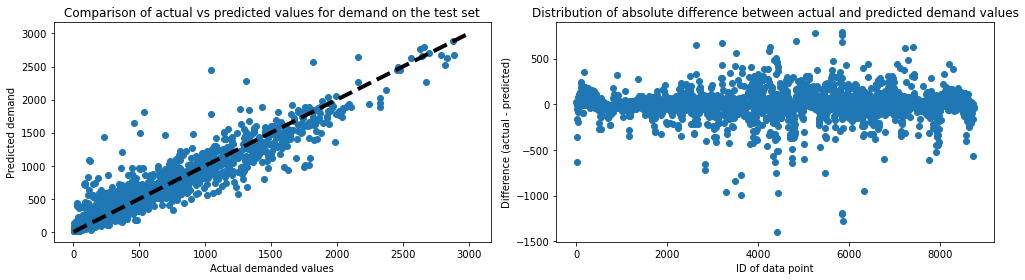

In [261]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14,4))

# First, plot the values for actual and predicted demand
ax[0].scatter(y_test, result_test_rf)
ax[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)  # Plot a line for the optimal prediction values
ax[0].set_xlabel("Actual demanded values")
ax[0].set_ylabel("Predicted demand")
ax[0].set_title("Comparison of actual vs predicted values for demand on the test set")

# Next, plot the actual difference between both values
ax[1].plot(y_test-result_test_rf, marker = 'o', linestyle = '')
ax[1].set_xlabel("ID of data point")
ax[1].set_ylabel("Difference (actual - predicted)")
ax[1].set_title("Distribution of absolute difference between actual and predicted demand values")

fig.tight_layout()

The dashed line would be the optimal prediction line, e.g. if the actual demand is 1.000 the predicted demand would ideally be 1.000 as well. It can be seen that the majority of prediction points reside near the optimal line. In the second figure, the deviations can be inspected more precise. Most of the prediction points lie between -100 and 100 which is as also expressed through the mean absolute error (MAE) of 80.2. However, some outliers do exist with the extreme of approximately -1.400 demanded bikes on one day.

## 4.5 XGBoost

As third regeression algorithm we decided to use XGBoost, an ensemble method. It stands for eXtreme Gradient Boosting and is an implementation of gradient boosted decision trees designed for speed and performance.

XGBoost is well known to provide better solutions than other machine learning algorithms. In fact, since its inception, it has become the "state-of-the-art” machine learning algorithm to deal with structured data. It is fast, especially compared to other implementations of gradient boosting. Furthermore, it is charaterized by good performance. In fact, XGBoost has outperformed other algorithm methods and shown better performance on a variety of machine learning benchmark datasets. Also, it has won many Kaggle competitions.



But XGBoost has some disadvantges. A common thing often forgotten is that Gradient Boosting is very sensitive to outliers since every classifier is forced to fix the errors in the predecessor learners. 
The overall method is hardly scalable. This is because the estimators base their correctness on previous predictors, hence the procedure involves a lot of struggle to streamline.

### 4.5.1 Creating a First Model 

First we separate the target variable, the demand, and the rest of the variables.The feature isWeekday is not considered further as we use weekday. Thus, it is redundant. 

In [263]:
#Separate the target variable and rest of the variables
xgb_X=  bike_predictive_final.drop(columns= ["demand", "season", "isWeekday"])
xgb_Y= bike_predictive_random_forest_Y = bike_predictive_final["demand"]

In [264]:
#convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains
data_dmatrix = xgb.DMatrix(data=xgb_X,label=xgb_Y)

Then we spilt the data set into train, validation and test data for cross-validation.

In [265]:
#train and test set for cross-validation of the results using the train_test_split function from sklearn's model_selection module with test_size size equal to 30% of the data. Also, to maintain reproducibility of the results, a random_state is also assigned.
X_train, X_test, y_train, y_test = train_test_split(xgb_X, xgb_Y, test_size=0.3, random_state=42)

# Then split the train dataset into train (50%) and validation (20% = 0.28571429 * 0,5) data set
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.28571429, random_state=42)

The XGBoost model is builded, fitted and we make our first prediciton. The hyperparameters are chosen in order to be reasonable and deliver good results. So, we first thought about an adequate range and then tried several combinations. The objective determines the loss function and is chosen for our case of regression as 'squarederror'. The **colsample_bytree** is the percentage of features used per tree. We chose 0.5 as high values can lead to overfitting. The **learning_rate** is chosen to prevent overfitting. As it is common to have small values (less than 0.1 or ranging between 0.1-0.3) we decided to start with 0.04. **n_estimators** is the number of trees you want to build. Smaller learning rates generally require more trees to be added to the model.This is why we chose to start with 500. The **max_depth** is 7 and determines how deeply each tree is allowed to grow during any boosting round. The **subsample** is the percentage of samples used by tree. Low values can cause underfitting. For this reason we chose 0.8 as value. **Gamma** is a regulaization parameter controlling the splitting of nodes (Minimum loss reduction required to make a further partition on a leaf node of the tree). The larger gamma is, the more conservative the algorithm will be. That is why we chose a value of 1.5.

In [219]:
#instantiate an XGBoost regressor object
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.04,
                max_depth = 7, gamma = 1.5, n_estimators = 500, subsample = 0.8)

In [220]:
#Fit the regressor to the training set and make predictions on the validation set
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_val)

In [221]:
# Print out relevant error metrics
print("R^2 for Train = %.4f" % xg_reg.score(X_train, y_train))
print("R^2 for Validation = %.4f" % r2_score(y_val, preds))
print("MAE = %.4f " % mean_absolute_error(y_val, preds))
print("MSE = %.4f " % mean_squared_error(y_val, preds))
print("RMSE = %.4f " % np.sqrt(mean_squared_error(y_val, preds)))
print("MAPE = %.4f " % (mean_absolute_percentage_error(y_val, preds)))

R^2 for Train = 0.9732
R^2 for Validation = 0.9283
MAE = 77.7919 
MSE = 18308.6749 
RMSE = 135.3096 
MAPE = 0.5891 


Looking at the error metric of this model, it can be said that the values are quite good. The R-sqared with 97% for the train and 92% for validation is high. Also, the mean absolute error (MAE) and the Root Mean Squared Error (RMSE) indicate that the model is relatively accurate.

### 4.5.2 Tuning Hyperparameters Using GridSearch

Besides the features hyperparameters are a deciding factor for model performance and tuning them can increase the model performance. In this section we use the validation set for hyperparameter tuning. GridSearch is used to facilitate the tuning and to explore more combinations of hyperparameters in order to find the best model combination. 

We have to limit the search space, because in a complete grid search there would be way to many combinations for computation. To narrow the range of values for each hyperparameter we perform a random grid search. The possible value space is limited by reasonable values for each hyperparameter. 

In [222]:
# First create a possible value space for each parameter and put all into one grid (dictionary)
max_depth = [4,5,6,7,8]
learning_rate = [float(x) for x in np.linspace(0.01 ,0.3 ,num=5)]
subsample = [0.7, 0.8, 0.9]
n_estimators = [int(x) for x in np.linspace(100,800,num=10)]
colsample_bytree = [0.4, 0.5,0.6]
gamma = [float(x) for x in np.linspace(0.5 ,4,num=5)]

hyperparameter_random_grid = {"max_depth": max_depth,
                                "learning_rate": learning_rate,
                                "n_estimators": n_estimators,
                                "subsample": subsample,
                                "colsample_bytree": colsample_bytree,
                                "gamma": gamma
                               }
# Create the random search with the above parameter grid, 3 folds of cross validation and 500 random iterations
random_search = RandomizedSearchCV(estimator = XGBRegressor(), param_distributions = hyperparameter_random_grid, 
                           cv = 3, n_jobs = -1, verbose = 4, scoring="r2", n_iter = 500, random_state=42)

random_search.fit(X_train, y_train)
random_search.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


{'subsample': 0.9,
 'n_estimators': 566,
 'max_depth': 5,
 'learning_rate': 0.08249999999999999,
 'gamma': 0.5,
 'colsample_bytree': 0.6}

In [232]:
#perform GridSearch to tune hyperparameters
gsc = GridSearchCV(estimator=XGBRegressor(),
                    param_grid={"max_depth": (5,6),
                                "learning_rate": ( 0.08, 0.09),
                                "n_estimators": [500,550,600],
                                "subsample":(0.8,0.9,1),
                                "colsample_bytree":(0.4, 0.5, 0.6),
                                "gamma" : (0.4,0.5,0.6)
                               },
                    cv=5,
                    scoring="r2",
                    verbose=4, #possibly 10 when takes too long
                    n_jobs=-1,
)

grid_result = gsc.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


Now we can apply this hyperparameters to the model.

In [233]:
#get the best parameters
gsc.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.6,
 'learning_rate': 0.08,
 'max_depth': 6,
 'n_estimators': 500,
 'subsample': 1}

In [234]:
#Apply hyperparameters to the model and fit the regressor to the training set and make predictions on the validation set
xg_reg_g = xgb.XGBRegressor(max_depth=6, learning_rate=0.08, n_estimators=500,
                 objective="reg:squarederror", subsample=1,
                 colsample_bytree=0.5, gamma = 0.6)
xg_reg_g.fit(X_train,y_train)

preds_g = xg_reg_g.predict(X_val)

In [235]:
# Print out relevant error metrics
print("R^2 for Train = %.4f" % xg_reg_g.score(X_train, y_train))
print("R^2 for Validation = %.4f" % r2_score(y_val, preds_g))
print("MAE = %.4f " % mean_absolute_error(y_val, preds_g))
print("MSE = %.4f " % mean_squared_error(y_val, preds_g))
print("RMSE = %.4f " % np.sqrt(mean_squared_error(y_val, preds_g)))
print("MAPE = %.4f " % (mean_absolute_percentage_error(y_val, preds_g)))

R^2 for Train = 0.9736
R^2 for Validation = 0.9304
MAE = 76.3896 
MSE = 17778.1905 
RMSE = 133.3349 
MAPE = 0.6055 


The error metrics of our model with the tuned hyperparameters show nearly no improvement compared to the first model. Even after modifying the range of parameters several times, the model could not be improved. We tried using RandomSearch as well as choosing values around the hyperparameters of our first model. We did this additionally hoping changing the values sightly could improve it further because our model already performed good. But the error metrics did only become better very slightly.

### 4.5.3 Final Results

We can now evaluate the model and get the importance of the model's features.

In [236]:
#get the importance of the features
importances = xg_reg_g.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

important_variable_values=sorted([i[0] for i in sorted_feature_importance[0:10]])
important_variable_names=[i[1] for i in sorted_feature_importance[0:10]]

Sorted Feature Importance:
[(0.33427665, 'isEveningRushHour'), (0.2821921, 'isDay'), (0.11759551, 'max_temp'), (0.08114192, 'full_hour'), (0.069330335, 'isMorningRushHour'), (0.046615347, 'weekday'), (0.037314404, 'month'), (0.031533692, 'precip')]


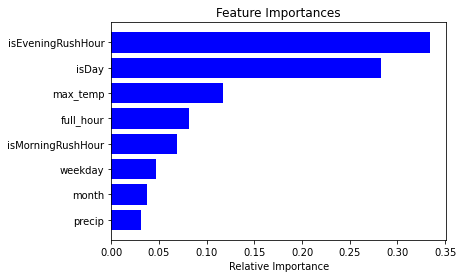

In [237]:
#plot the importance of the features
a = list(range(7,-1,-1))
features = important_variable_names
indices = a

plt.title('Feature Importances')
plt.barh(range(len(a)), important_variable_values, color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The relative importance of the features shows how much they are weighted for the prediction. We can observe that the most important feature is 'isEveningRushHour' with 34% followed by 'isDay'  with 27%. 'maxTemp' is about 12% and the third important feature followed by the full hour. The distribution of feature importance seems logic and resonable.

We now predict on the test set to validate the results and plot the difference between actual and predicted demand.

In [266]:
# predict on the test set
preds = xg_reg_g.predict(X_test)

# Print out relevant error metrics
print("R^2 for Train = %.4f" % xg_reg_g.score(X_train, y_train))
print("R^2 for Test = %.4f" % r2_score(y_test, preds))
print("MAE = %.4f " % mean_absolute_error(y_test, preds))
print("MSE = %.4f " % mean_squared_error(y_test, preds))
print("RMSE = %.4f " % np.sqrt(mean_squared_error(y_test, preds)))
print("MAPE = %.4f " % (mean_absolute_percentage_error(y_test, preds)))

R^2 for Train = 0.9736
R^2 for Test = 0.9171
MAE = 81.9382 
MSE = 21518.9079 
RMSE = 146.6932 
MAPE = 0.6521 


The final XGBoost model results in a R-squared value of 91.7%. This means that 91.7% of the proportion of the variance in the demand can be accounted for by the model. The mean absolute percentage error shows each prediction deviates nearly 65% from the actual value on average. The mean absolute error (MAE) is 81.9 which means that in each prediction of the bike demand in one hour, there are 82 too many or too less bikes predicted on average.

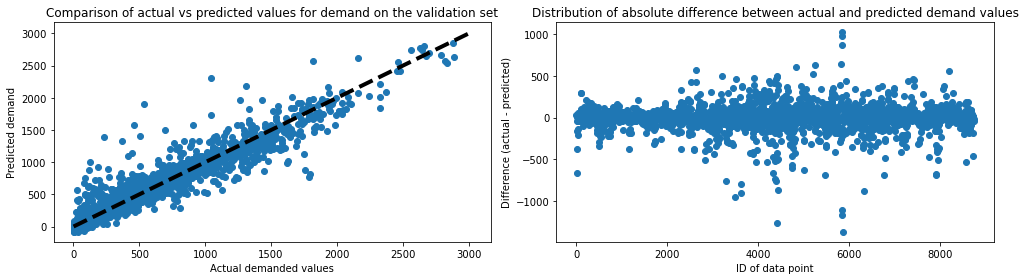

In [240]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(14,4))

# First, plot the values for actual and predicted demand
ax[0].scatter(y_test, preds)
ax[0].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)  # Plot a line for the optimal prediction values
ax[0].set_xlabel("Actual demanded values")
ax[0].set_ylabel("Predicted demand")
ax[0].set_title("Comparison of actual vs predicted values for demand on the validation set")

# Next, plot the actual difference between both values
ax[1].plot(y_test-preds, marker = 'o', linestyle = '')
ax[1].set_xlabel("ID of data point")
ax[1].set_ylabel("Difference (actual - predicted)")
ax[1].set_title("Distribution of absolute difference between actual and predicted demand values")

fig.tight_layout()


The dashed line would be the optimal prediction line.The majority of prediction points reside near the optimal line. In the second figure, the deviations can be inspected more precisely. Most of the prediction points lie between -150 and 150 which is as also expressed through the mean absolute error (MAE) of 78. However, some outliers to exist with the extreme of approximately -1.000 demanded bikes on one day. So, compared to the Random Forest the MAE is higher, but the outliers are less extreme.

<h2> 4.6 Model Selection and Outlook </h2>

In [276]:
model1 = "Lasso (L1) Regression"
model2 = "Random Forest"
model3 = "XGBoost"

results = {'Model':[model1, model2, model3],  
            'R-squared Train':[l1_r2_train,rf_rsquared_train,xg_reg_g.score(X_train, y_train)],
            'R-squared Test':[l1_r2_test,rf_rsquared_test,r2_score(y_test, preds)],
            'MAE':[l1_mae,rf_mae,mean_absolute_error(y_test, preds)],
            'MSE':[l1_mse,rf_mse,mean_squared_error(y_test, preds)],
            'RMSE':[l1_rmse,rf_rmse,np.sqrt(mean_squared_error(y_test, preds))],
            'MAPE':[l1_mape,rf_mape,(mean_absolute_percentage_error(y_test, preds))]
          } 

results_df = pd.DataFrame(results)
results_df

,Model,R-squared Train,R-squared Test,MAE,MSE,RMSE,MAPE
0,Lasso (L1) Regression,0.907344,0.870992,110.891394,33496.118119,183.019447,1.118139
1,Random Forest,0.988062,0.916826,80.205573,21595.745800,146.954911,0.502030
2,XGBoost,0.973565,0.917122,81.938185,21518.907884,146.693244,0.652096


For deployment we would choose the Random Forest model as it delivered the best results in the MAPE. Although XGBoost is also a good candidate, and has a higher R-Squared value, the R-squared for the Random Forest Model is nearly equal to that one of XGBoost. Additionally the MAPE is 15% lower and the MAE lower by 2. This means that the average deviation of a demand prediction is less when using Random Forest. Moreover, the Random Forest works well with both categorical and continuous values and for our case the speed is adequate. Furthermore, it provides great prediction accuracy and reduces overfitting.

### Future Improvements/Outlook
Still, there are some possibilities to improve the model further, that could be focused on in a follow-up project. 

First, more features could be included. Especially, regarding the weather data features to precise the weather conditions are interesting. For example, windspeed, snowfall, humidity and pressure (https://www.sciencedirect.com/science/article/pii/S0198971520302544). 

In Addition, special events and holidays could be taken into consideration. In general, more data and more features could be included. But this takes additional time in data cleaning and preparation into account. Speaking of more data, it could make sense to include data from multiple previous years. This would enable us also to take a look at time series analysis for additional and different models. In addition to that, we could also take a look at unsupervised learning techniques (like clustering), in order to find out about relationships in our data, of which we are not aware. These relationships could then serve as an input for additional features and pattern recognition in our data.

With regard to our chosen model itself, a larger grid search to tune the hyperparameters could improve the results further as we were limited by computational power. Even though we decreased the computation time of the grid search by a random grid search first, the computation did still last about 10 minutes. With more combinations of hyperparameters, the computational time increases exponentially which we could not bear.

Furthermore, it could be one idea to not only predict the total system demand on an hourly basis but also integrate the different stations. That means, the prediction would be based on the station level demand for each station. This could enhance the predictions and make the demand forecast more accurate.